C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Fold 1 - Accuracy: 0.6470588235294118
Confusion matrix:


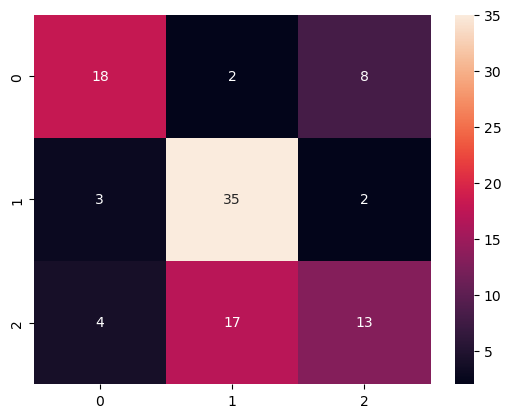

Fold 2 - Accuracy: 0.7058823529411765
Confusion matrix:


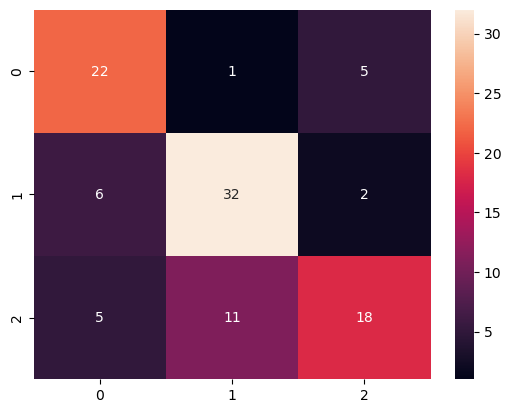

Fold 3 - Accuracy: 0.5588235294117647
Confusion matrix:


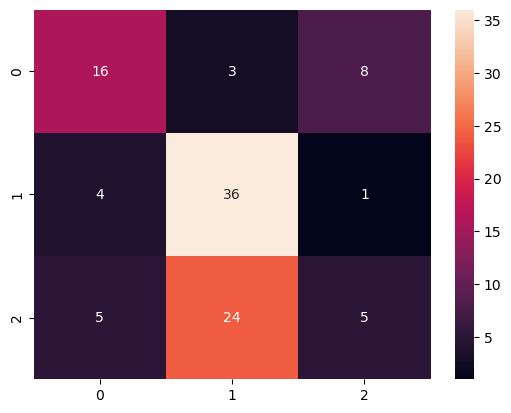

Fold 4 - Accuracy: 0.47058823529411764
Confusion matrix:


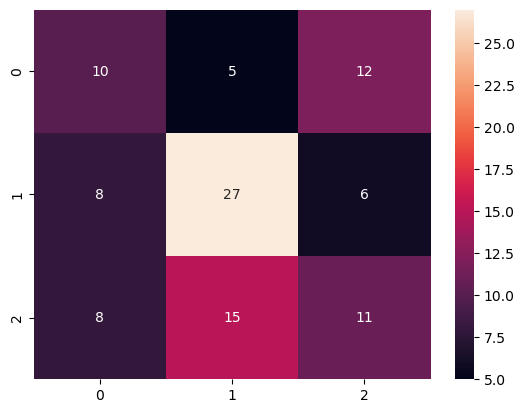

Fold 5 - Accuracy: 0.5742574257425742
Confusion matrix:


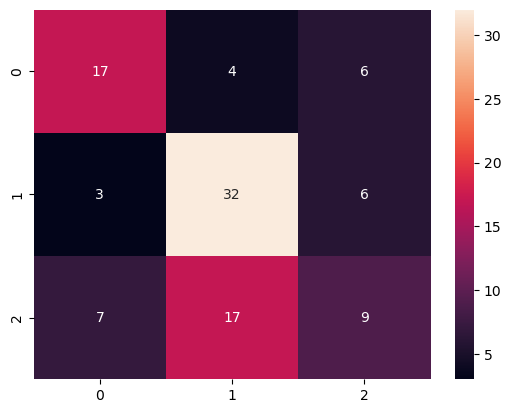

Fold 6 - Accuracy: 0.6435643564356436
Confusion matrix:


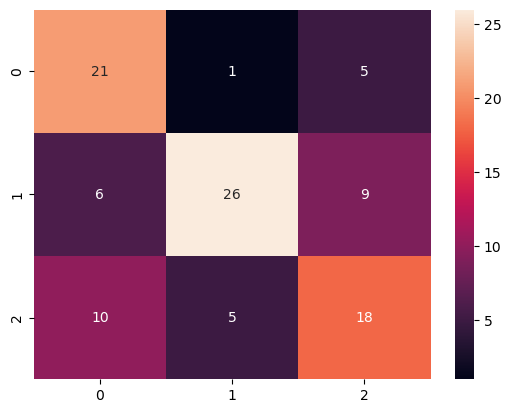

Fold 7 - Accuracy: 0.5643564356435643
Confusion matrix:


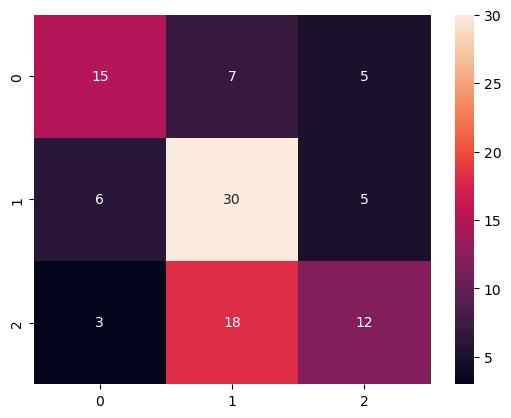

Fold 8 - Accuracy: 0.5544554455445545
Confusion matrix:


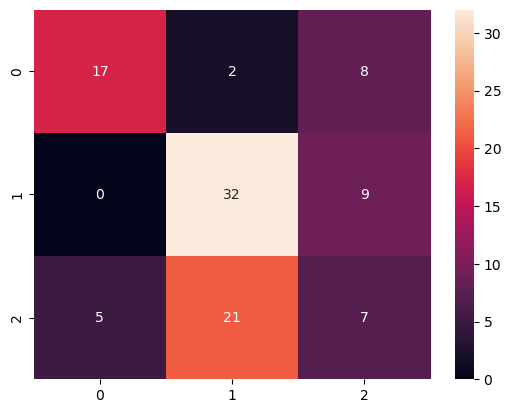

Fold 9 - Accuracy: 0.5742574257425742
Confusion matrix:


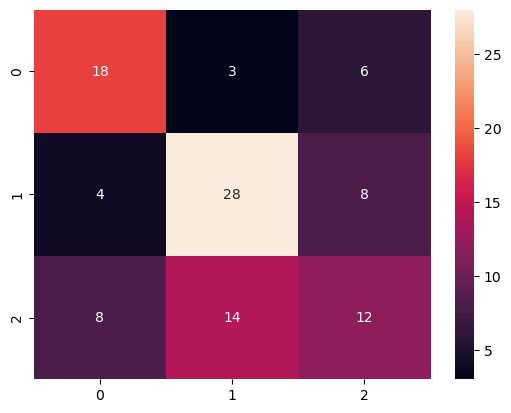

Fold 10 - Accuracy: 0.5247524752475248
Confusion matrix:


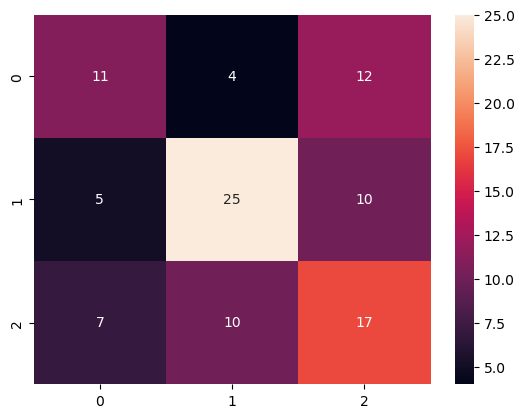

Average Accuracy: 0.5817996505532907


In [1]:
#logisic regression
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'RiskLevel' as the target variable
df = pd.read_csv('Dataset.csv')

# Exclude the 'BS' column
X = df.drop(['RiskLevel', 'BS'], axis=1)
y = df['RiskLevel']

skf = StratifiedKFold(n_splits=10)
accuracies = []

for fold_idx, (train_index, val_index) in enumerate(skf.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    logreg = LogisticRegression(max_iter=1500)
    logreg.fit(X_train, y_train)
    y_val_pred = logreg.predict(X_val)

    # Calculating accuracy and appending it to the accuracies list
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)

    # Confusion matrix
    print(f"Fold {fold_idx + 1} - Accuracy: {accuracy}")
    print("Confusion matrix:")
    cm = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(cm, annot=True)
    plt.show()

avg_accuracy = sum(accuracies) / len(accuracies)
print("Average Accuracy:", avg_accuracy)


Fold 1 - Accuracy: 0.38235294117647056
Confusion matrix:


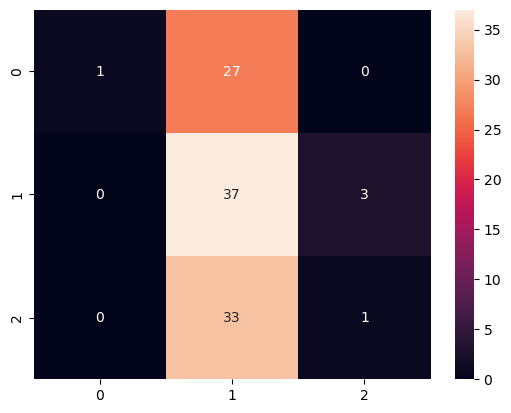

Fold 2 - Accuracy: 0.3627450980392157
Confusion matrix:


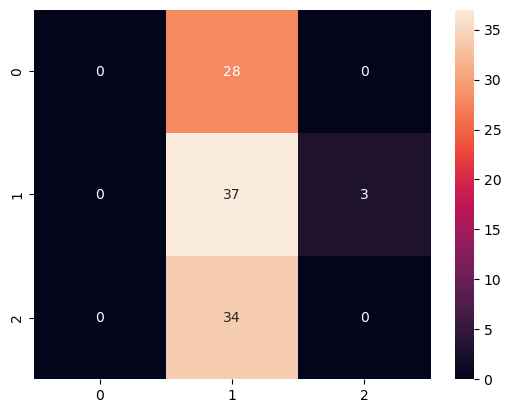

Fold 3 - Accuracy: 0.37254901960784315
Confusion matrix:


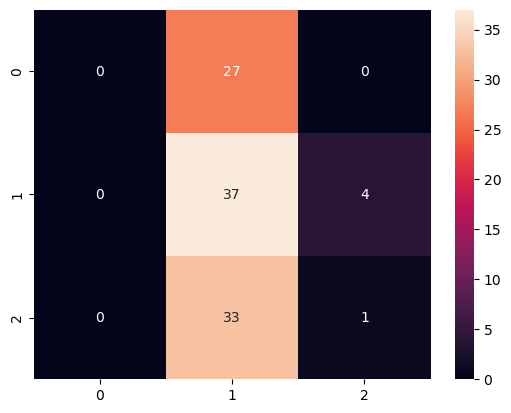

Fold 4 - Accuracy: 0.38235294117647056
Confusion matrix:


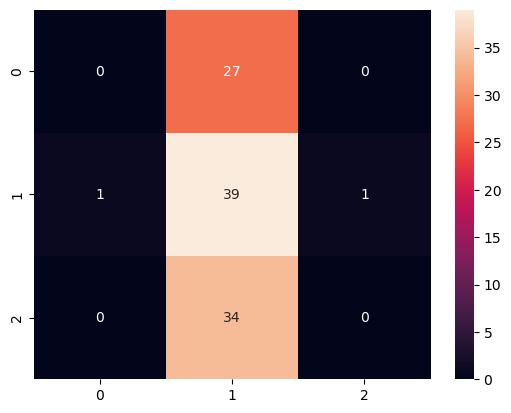

Fold 5 - Accuracy: 0.42574257425742573
Confusion matrix:


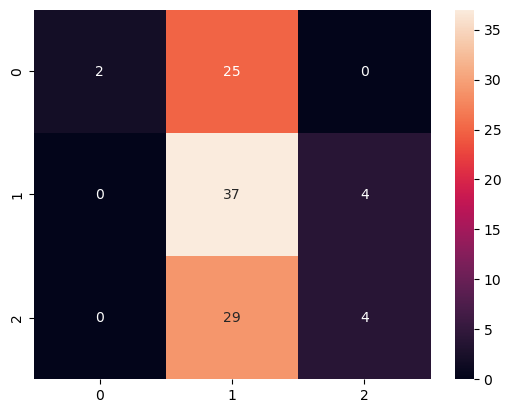

Fold 6 - Accuracy: 0.36633663366336633
Confusion matrix:


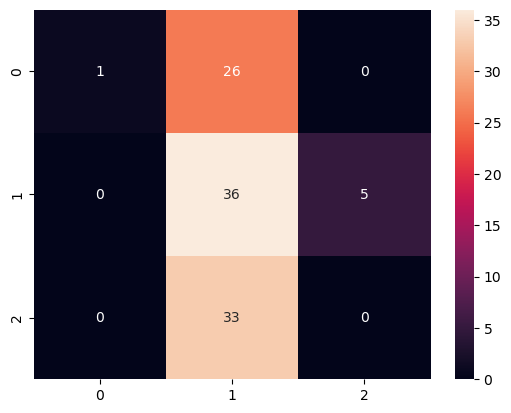

Fold 7 - Accuracy: 0.38613861386138615
Confusion matrix:


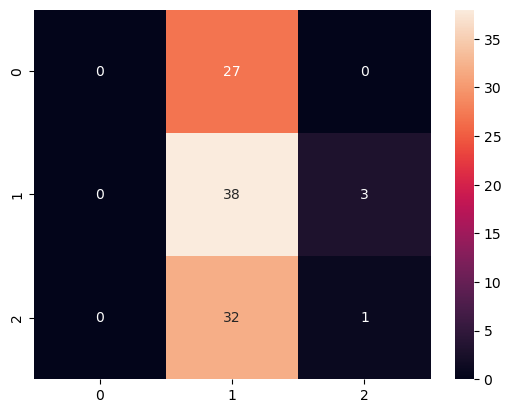

Fold 8 - Accuracy: 0.297029702970297
Confusion matrix:


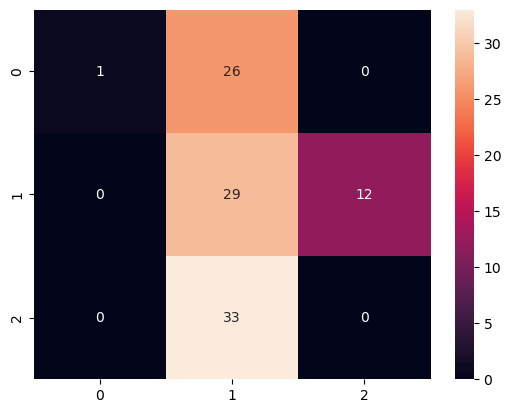

Fold 9 - Accuracy: 0.31683168316831684
Confusion matrix:


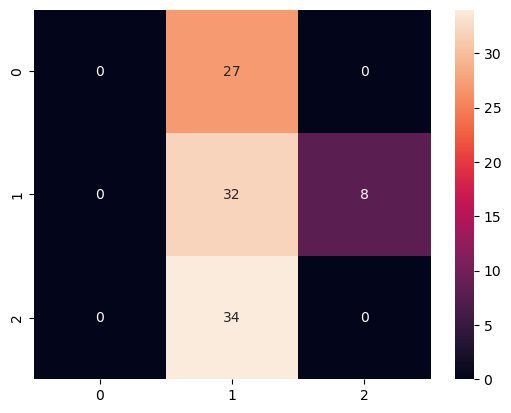

Fold 10 - Accuracy: 0.40594059405940597
Confusion matrix:


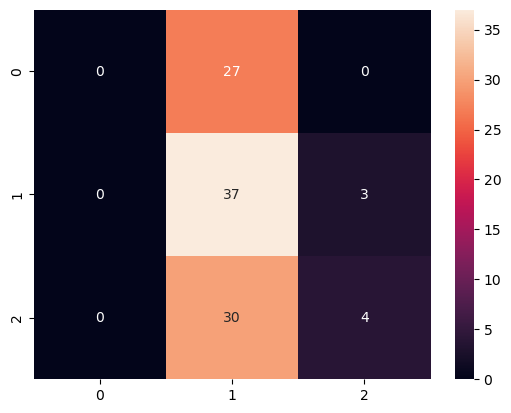

Average Accuracy: 0.36980198019801974


In [3]:
#Linear Regression
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X = df.drop(['RiskLevel', 'BS'], axis=1)
y = df['RiskLevel']

skf = StratifiedKFold(n_splits=10)
accuracies = []

for fold_idx, (train_index, val_index) in enumerate(skf.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]
    ordinal_encoder = OrdinalEncoder()
    y_train_encoded = ordinal_encoder.fit_transform(y_train.values.reshape(-1, 1)).flatten()
    y_val_encoded = ordinal_encoder.transform(y_val.values.reshape(-1, 1)).flatten()
    linreg = LinearRegression()
    linreg.fit(X_train, y_train_encoded)
    y_val_pred_encoded = linreg.predict(X_val)
    y_val_pred = y_val_pred_encoded.round().astype(int)
    accuracy = accuracy_score(y_val_encoded, y_val_pred)
    accuracies.append(accuracy)
    print(f"Fold {fold_idx + 1} - Accuracy: {accuracy}")
    print("Confusion matrix:")
    cm = confusion_matrix(y_val_encoded, y_val_pred)
    sns.heatmap(cm, annot=True)
    plt.show()
avg_accuracy = sum(accuracies) / len(accuracies)
print("Average Accuracy:", avg_accuracy)


Fold 1 - Accuracy: 0.6372549019607843
Confusion matrix:


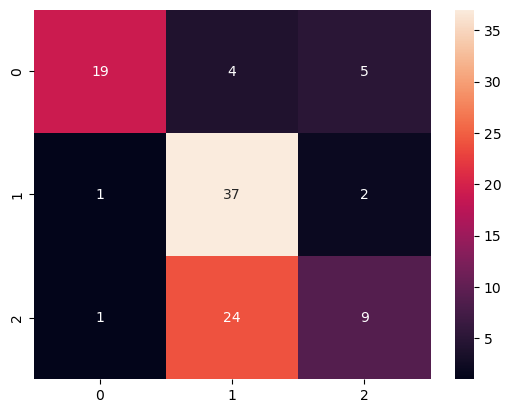

Fold 2 - Accuracy: 0.6274509803921569
Confusion matrix:


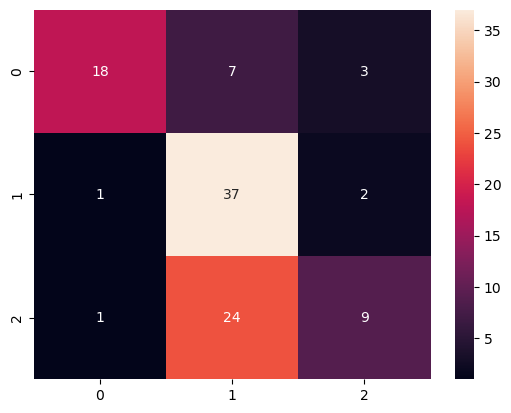

Fold 3 - Accuracy: 0.5490196078431373
Confusion matrix:


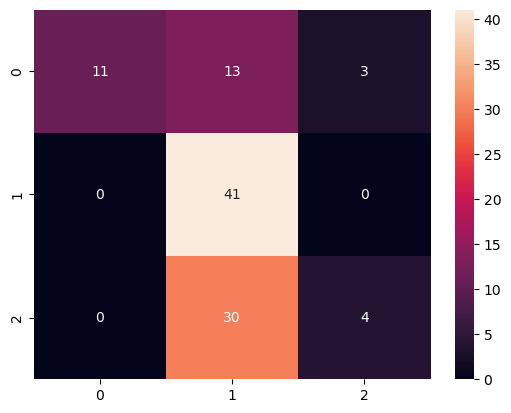

Fold 4 - Accuracy: 0.5098039215686274
Confusion matrix:


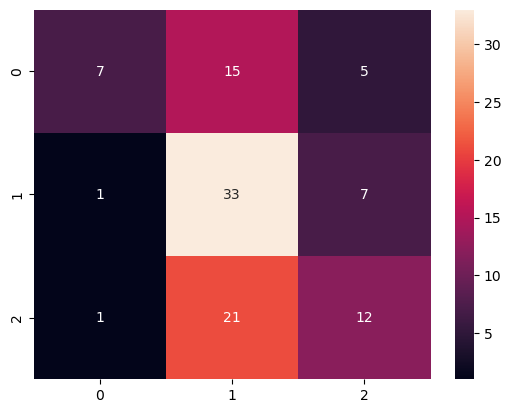

Fold 5 - Accuracy: 0.5247524752475248
Confusion matrix:


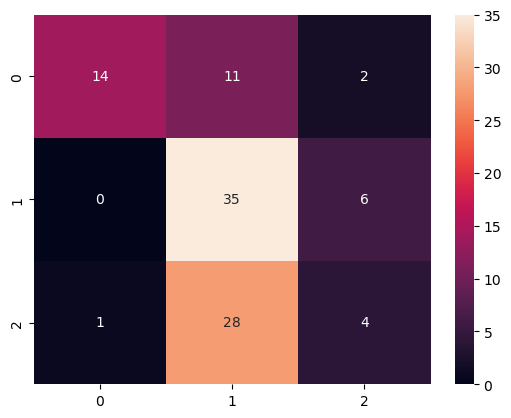

Fold 6 - Accuracy: 0.6435643564356436
Confusion matrix:


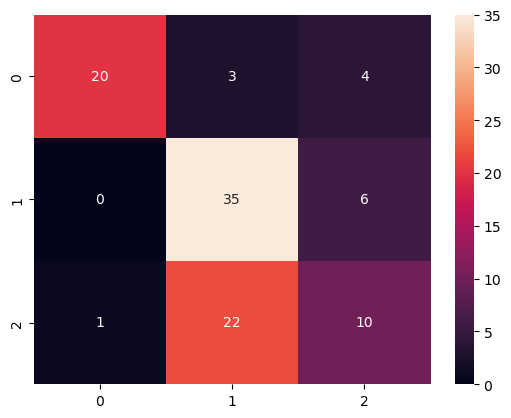

Fold 7 - Accuracy: 0.5742574257425742
Confusion matrix:


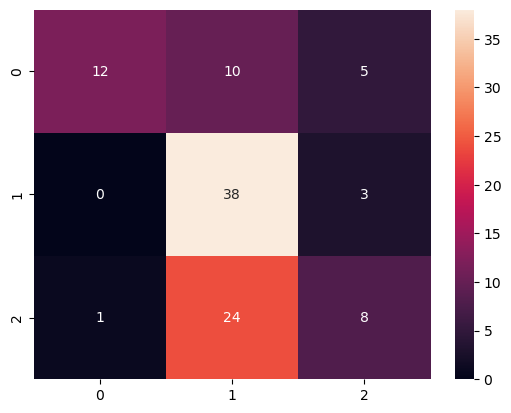

Fold 8 - Accuracy: 0.5544554455445545
Confusion matrix:


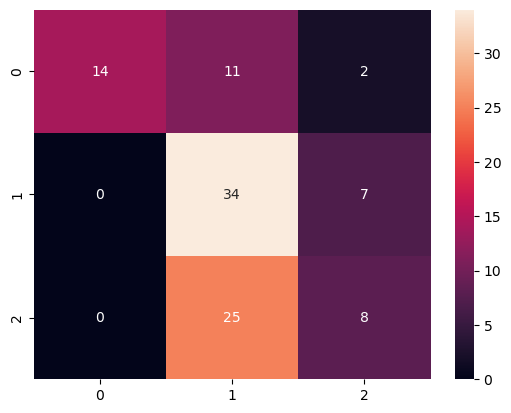

Fold 9 - Accuracy: 0.5544554455445545
Confusion matrix:


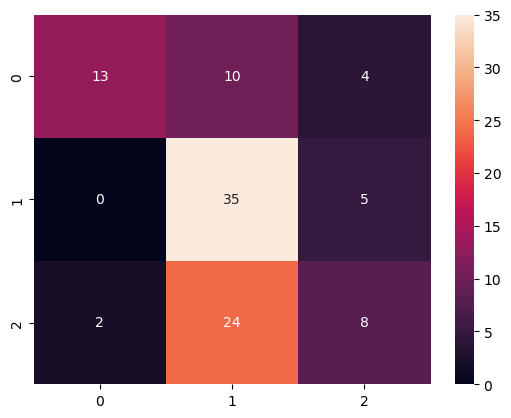

Fold 10 - Accuracy: 0.5247524752475248
Confusion matrix:


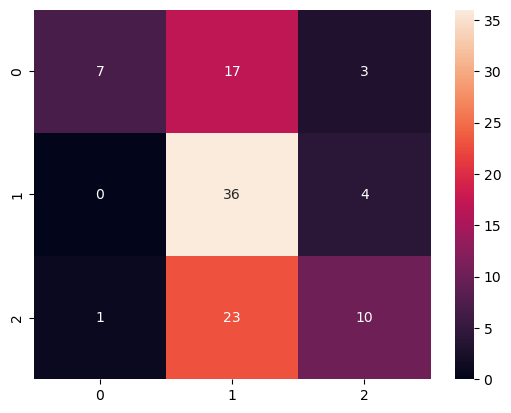

Average Accuracy: 0.5699767035527081


In [4]:
#Support Vector Machine
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
X = df.drop(['RiskLevel', 'BS'], axis=1)
y = df['RiskLevel']
svm = SVC()
skf = StratifiedKFold(n_splits=10)

accuracies = []
for fold_idx, (train_index, val_index) in enumerate(skf.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]
    svm.fit(X_train, y_train)
    y_val_pred = svm.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)
    print(f"Fold {fold_idx + 1} - Accuracy: {accuracy}")
    print("Confusion matrix:")
    cm = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(cm, annot=True)
    plt.show()
avg_accuracy = sum(accuracies) / len(accuracies)
print("Average Accuracy:", avg_accuracy)


Fold 1 - Accuracy: 0.8431372549019608
Confusion matrix:


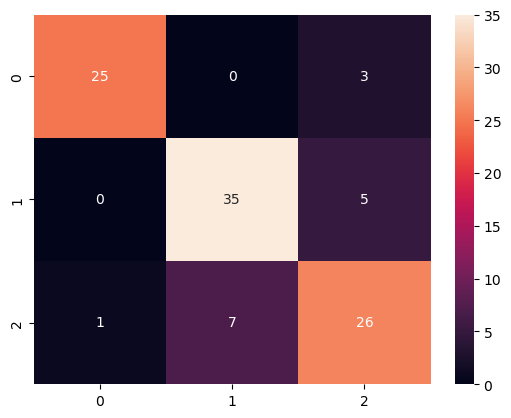

Fold 2 - Accuracy: 0.8235294117647058
Confusion matrix:


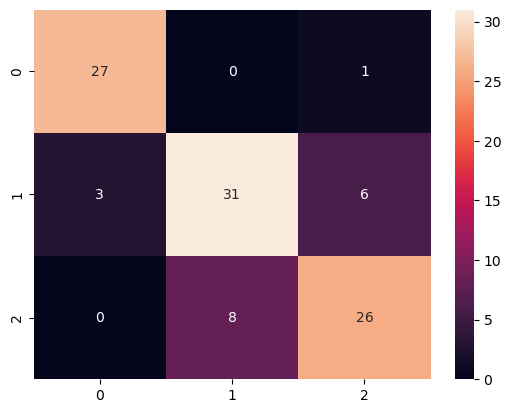

Fold 3 - Accuracy: 0.7254901960784313
Confusion matrix:


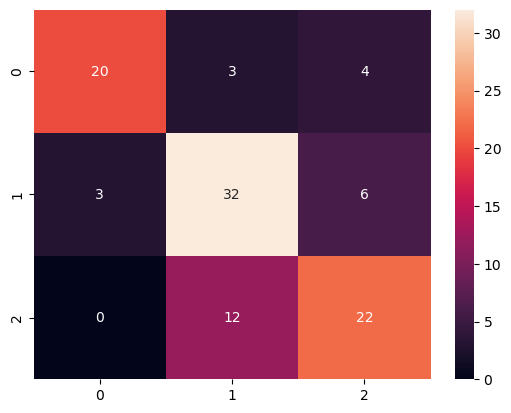

Fold 4 - Accuracy: 0.7058823529411765
Confusion matrix:


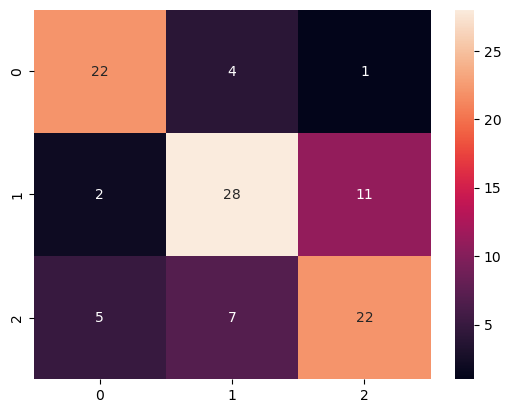

Fold 5 - Accuracy: 0.7128712871287128
Confusion matrix:


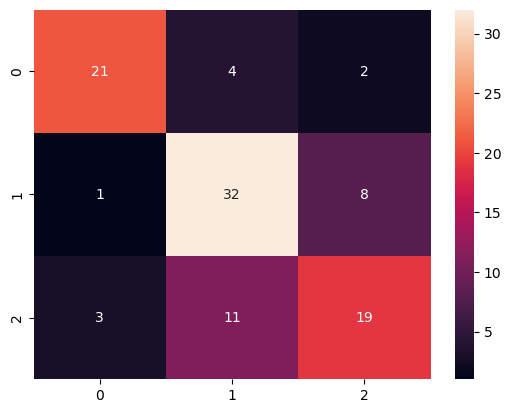

Fold 6 - Accuracy: 0.7425742574257426
Confusion matrix:


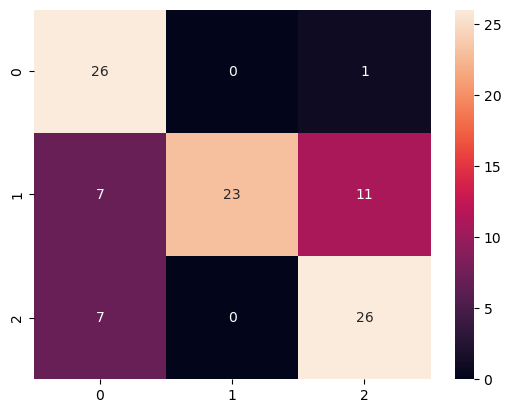

Fold 7 - Accuracy: 0.7623762376237624
Confusion matrix:


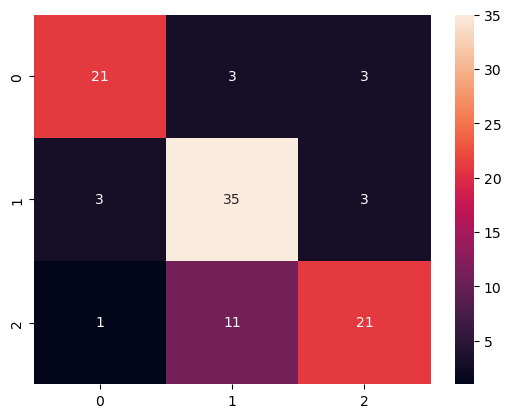

Fold 8 - Accuracy: 0.7227722772277227
Confusion matrix:


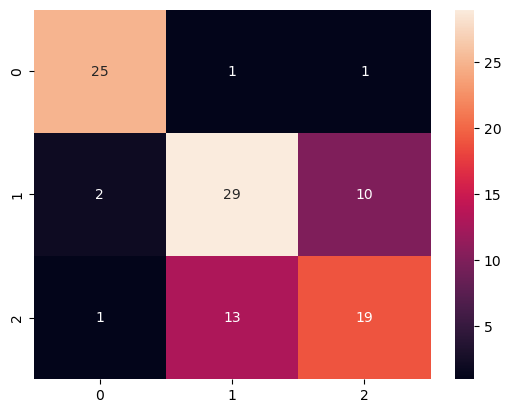

Fold 9 - Accuracy: 0.6831683168316832
Confusion matrix:


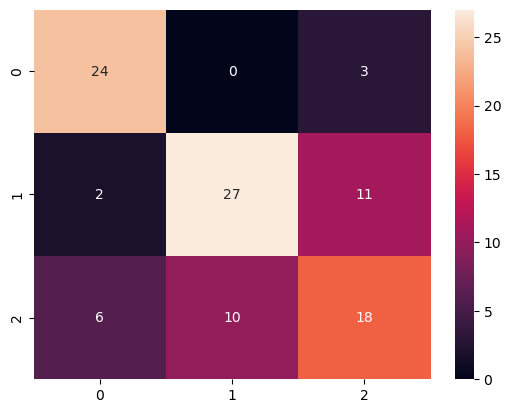

Fold 10 - Accuracy: 0.7821782178217822
Confusion matrix:


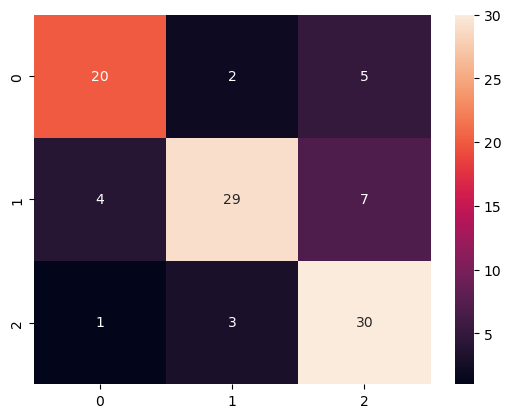

Average Accuracy: 0.750397980974568


In [5]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_predict, StratifiedKFold
X = df.drop(['RiskLevel', 'BS'], axis=1)
y = df['RiskLevel']
rf = RandomForestClassifier()
skf = StratifiedKFold(n_splits=10)

accuracies = []

for fold_idx, (train_index, val_index) in enumerate(skf.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]
    rf.fit(X_train, y_train)
    y_val_pred = rf.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)
    print(f"Fold {fold_idx + 1} - Accuracy: {accuracy}")
    print("Confusion matrix:")
    cm = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(cm, annot=True)
    plt.show()
avg_accuracy = np.mean(accuracies)
print("Average Accuracy:", avg_accuracy)


Fold 1 - Accuracy: 0.8137254901960784
Confusion matrix:


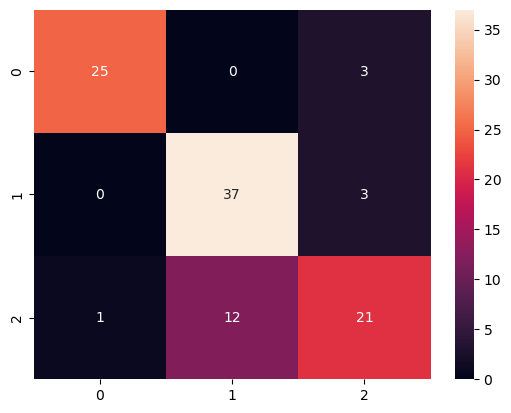

Fold 2 - Accuracy: 0.8627450980392157
Confusion matrix:


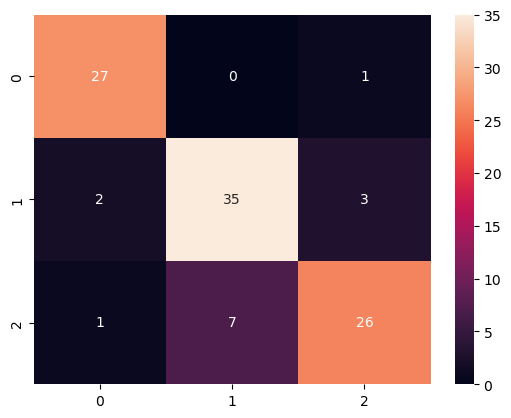

Fold 3 - Accuracy: 0.6470588235294118
Confusion matrix:


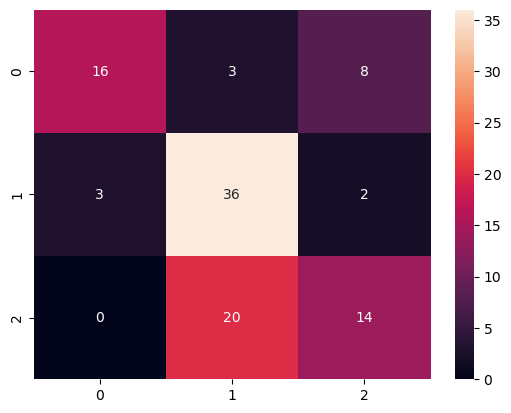

Fold 4 - Accuracy: 0.6274509803921569
Confusion matrix:


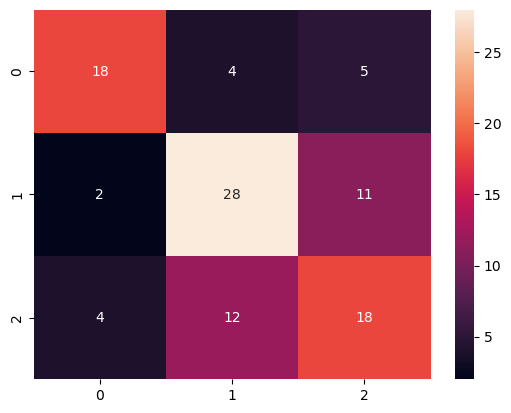

Fold 5 - Accuracy: 0.7128712871287128
Confusion matrix:


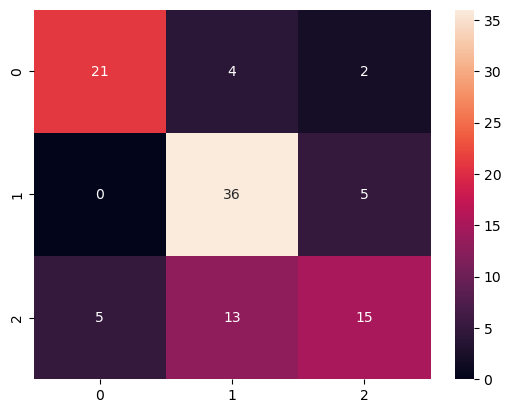

Fold 6 - Accuracy: 0.7524752475247525
Confusion matrix:


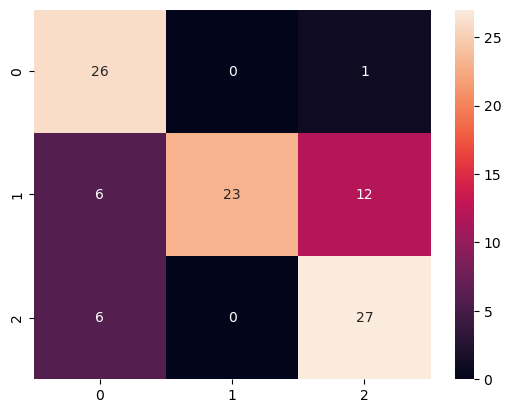

Fold 7 - Accuracy: 0.7425742574257426
Confusion matrix:


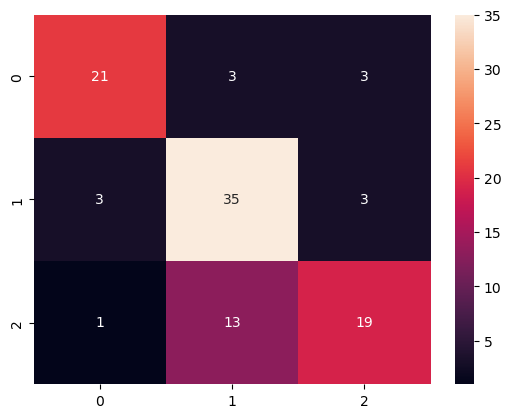

Fold 8 - Accuracy: 0.7425742574257426
Confusion matrix:


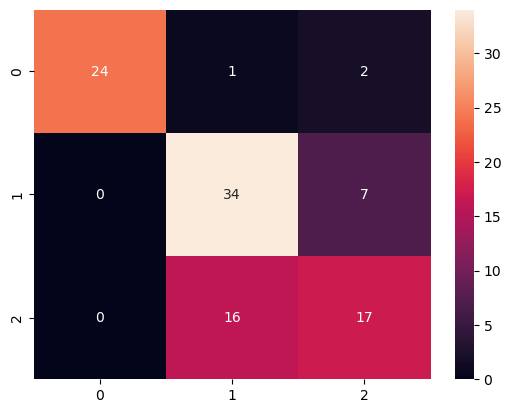

Fold 9 - Accuracy: 0.6237623762376238
Confusion matrix:


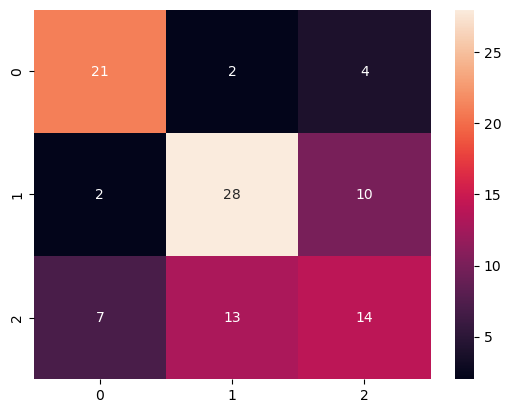

Fold 10 - Accuracy: 0.7128712871287128
Confusion matrix:


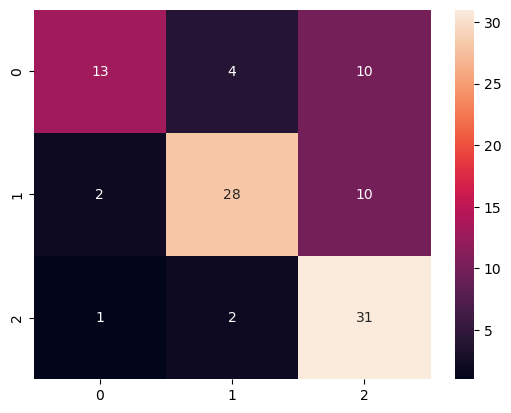

Average Accuracy: 0.723810910502815


In [6]:
#Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np
X = df.drop(['RiskLevel', 'BS'], axis=1)
y = df['RiskLevel']
gb = GradientBoostingClassifier()
skf = StratifiedKFold(n_splits=10)

accuracies = []

for fold_idx, (train_index, val_index) in enumerate(skf.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]
    gb.fit(X_train, y_train)
    y_val_pred = gb.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)
    print(f"Fold {fold_idx + 1} - Accuracy: {accuracy}")
    print("Confusion matrix:")
    cm = confusion_matrix(y_val, y_val_pred)
    cm = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(cm, annot=True)
    plt.show()
avg_accuracy = np.mean(accuracies)
print("Average Accuracy:", avg_accuracy)


Fold 1 - Accuracy: 0.6274509803921569
Confusion matrix:


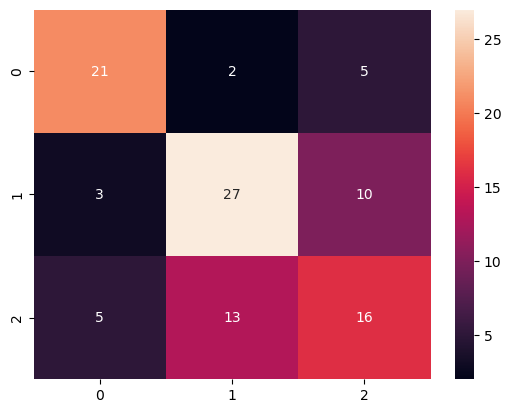

Fold 2 - Accuracy: 0.6666666666666666
Confusion matrix:


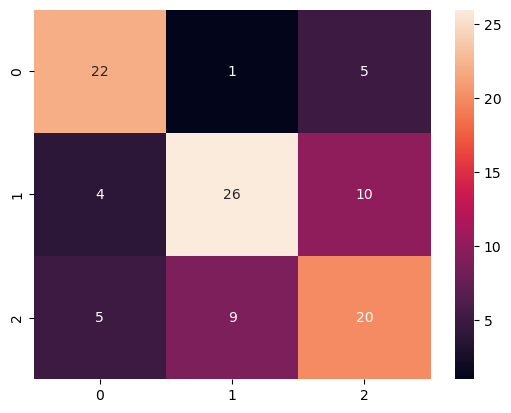

Fold 3 - Accuracy: 0.5392156862745098
Confusion matrix:


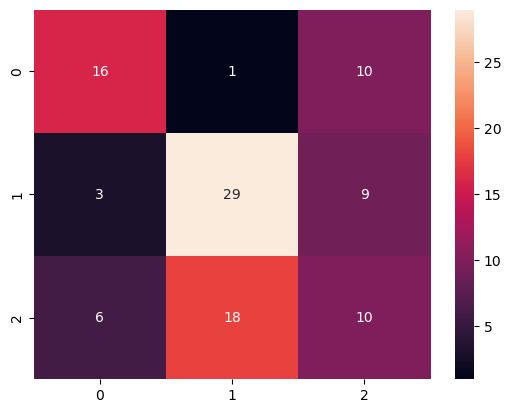

Fold 4 - Accuracy: 0.5196078431372549
Confusion matrix:


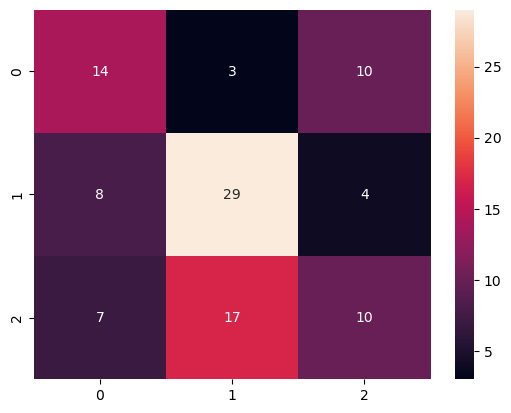

Fold 5 - Accuracy: 0.5742574257425742
Confusion matrix:


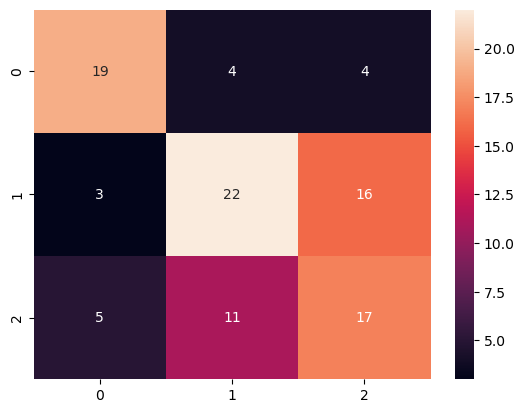

Fold 6 - Accuracy: 0.6633663366336634
Confusion matrix:


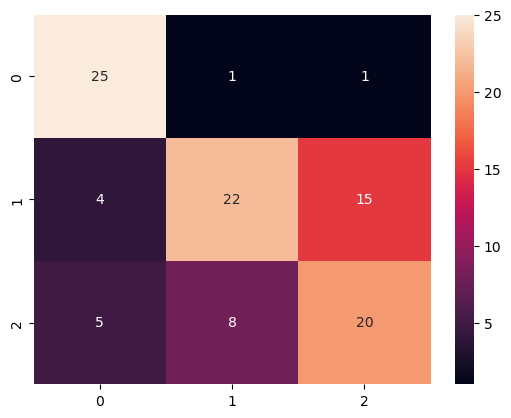

Fold 7 - Accuracy: 0.5346534653465347
Confusion matrix:


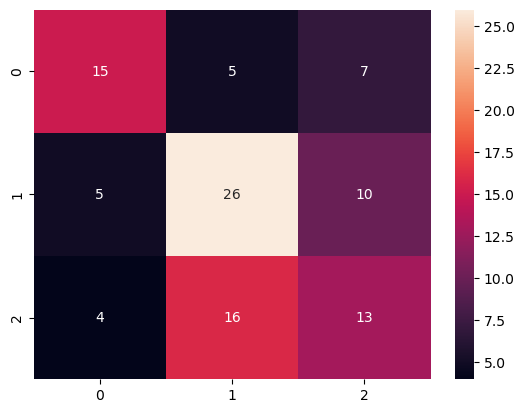

Fold 8 - Accuracy: 0.6039603960396039
Confusion matrix:


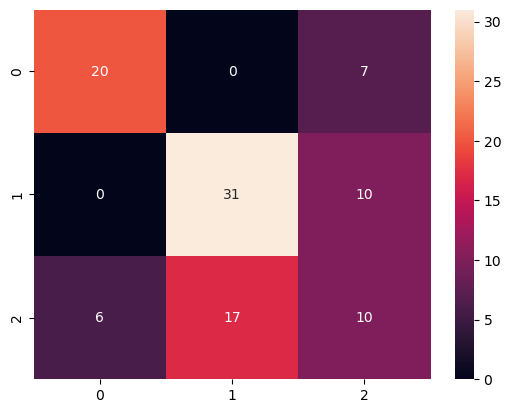

Fold 9 - Accuracy: 0.5742574257425742
Confusion matrix:


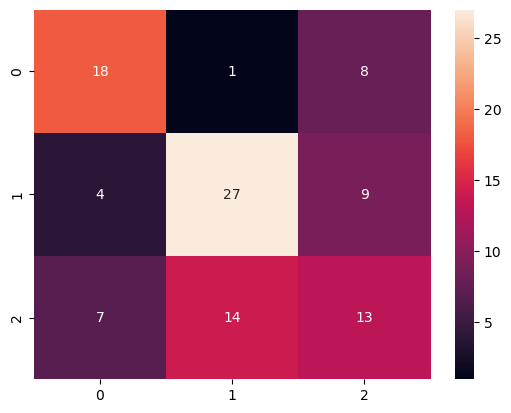

Fold 10 - Accuracy: 0.5346534653465347
Confusion matrix:


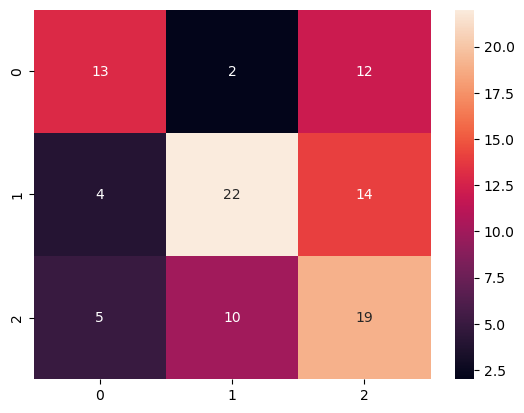

Average Accuracy: 0.5838089691322074


In [7]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np
X = df.drop(['RiskLevel', 'BS'], axis=1)
y = df['RiskLevel']
nb = GaussianNB()
skf = StratifiedKFold(n_splits=10)

accuracies = []

for fold_idx, (train_index, val_index) in enumerate(skf.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]
    nb.fit(X_train, y_train)
    y_val_pred = nb.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)
    print(f"Fold {fold_idx + 1} - Accuracy: {accuracy}")
    print("Confusion matrix:")
    cm = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(cm, annot=True)
    plt.show()
avg_accuracy = np.mean(accuracies)
print("Average Accuracy:", avg_accuracy)


Fold 1 - Accuracy: 0.7745098039215687
Confusion matrix:


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


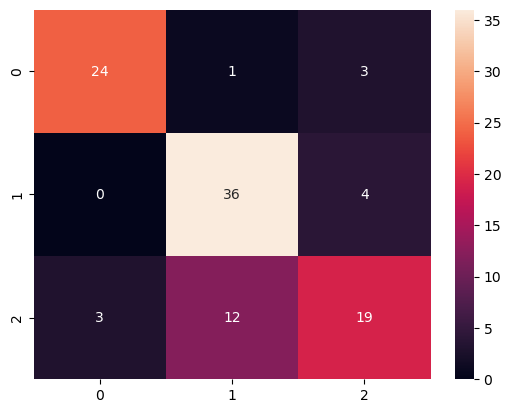

Fold 2 - Accuracy: 0.7843137254901961
Confusion matrix:


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


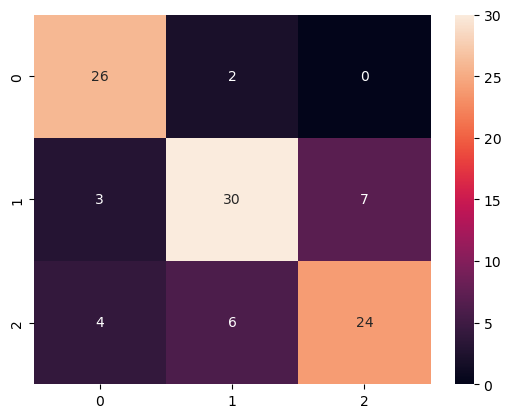

Fold 3 - Accuracy: 0.6666666666666666
Confusion matrix:


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


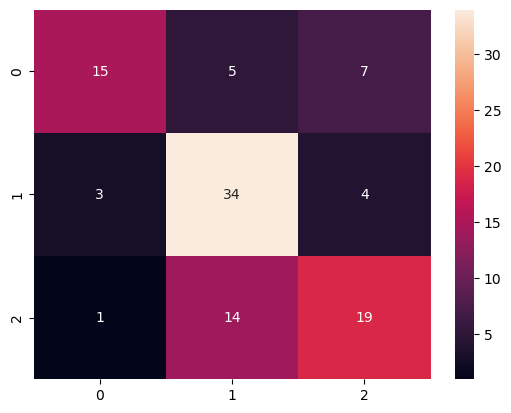

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Fold 4 - Accuracy: 0.6176470588235294
Confusion matrix:


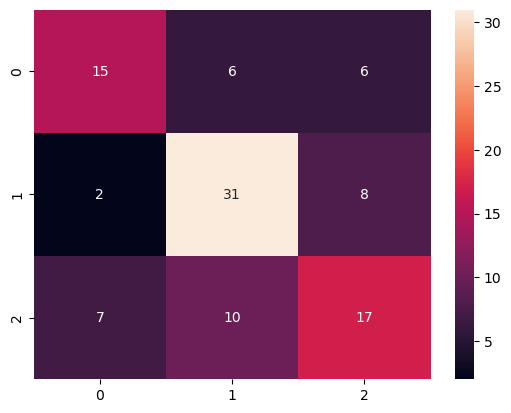

Fold 5 - Accuracy: 0.6435643564356436
Confusion matrix:


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


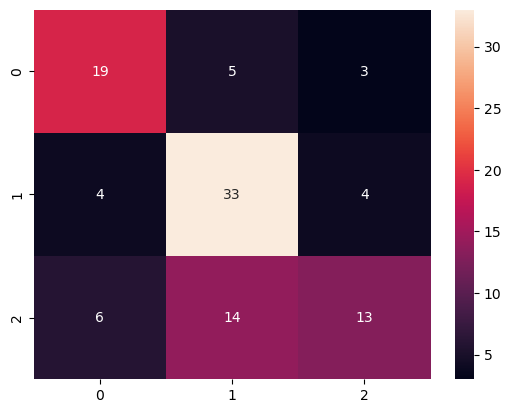

Fold 6 - Accuracy: 0.693069306930693
Confusion matrix:


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


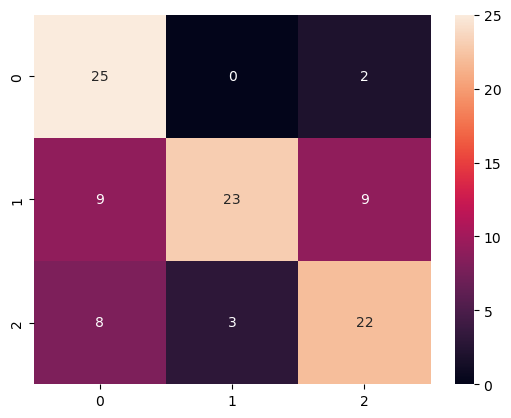

Fold 7 - Accuracy: 0.7029702970297029
Confusion matrix:


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


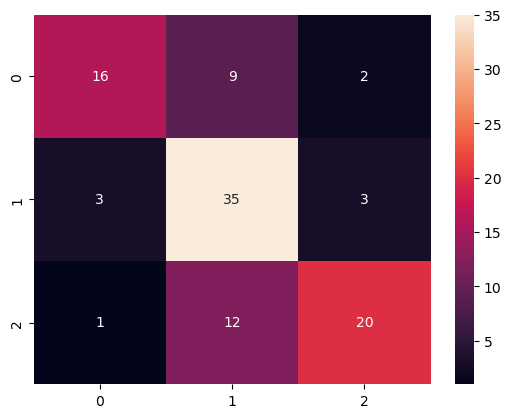

Fold 8 - Accuracy: 0.6138613861386139
Confusion matrix:


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


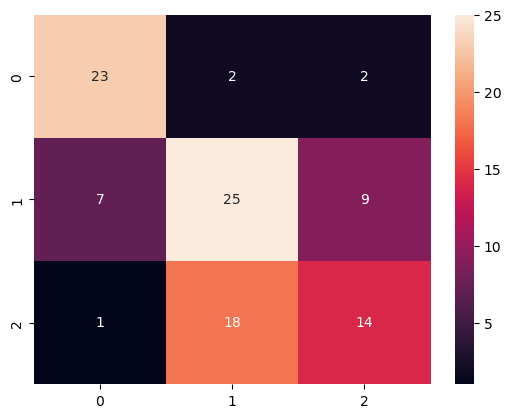

Fold 9 - Accuracy: 0.6237623762376238
Confusion matrix:


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


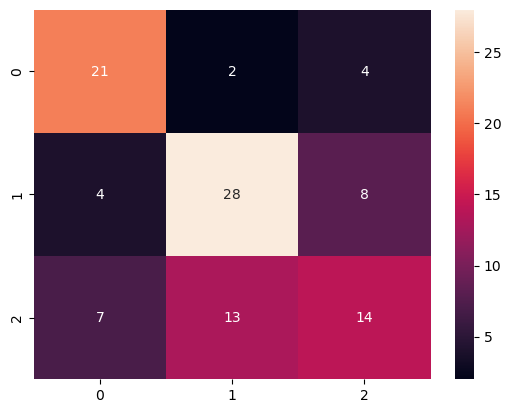

Fold 10 - Accuracy: 0.6732673267326733
Confusion matrix:


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


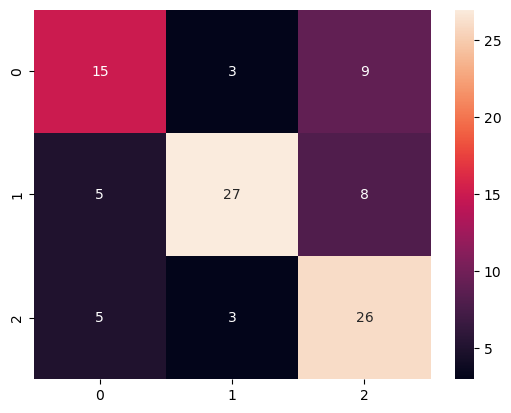

Average Accuracy: 0.679363230440691


In [8]:
#knearest neighbour

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np
X = df.drop(['RiskLevel', 'BS'], axis=1)
y = df['RiskLevel']
knn = KNeighborsClassifier(n_neighbors=5)
skf = StratifiedKFold(n_splits=10)

accuracies = []  

for fold_idx, (train_index, val_index) in enumerate(skf.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]
    knn.fit(X_train, y_train)
    y_val_pred = knn.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)
    print(f"Fold {fold_idx + 1} - Accuracy: {accuracy}")
    print("Confusion matrix:")
    cm = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(cm, annot=True)
    plt.show()
avg_accuracy = np.mean(accuracies)
print("Average Accuracy:", avg_accuracy)


Fold 1 - Accuracy: 0.8137254901960784
Confusion matrix:


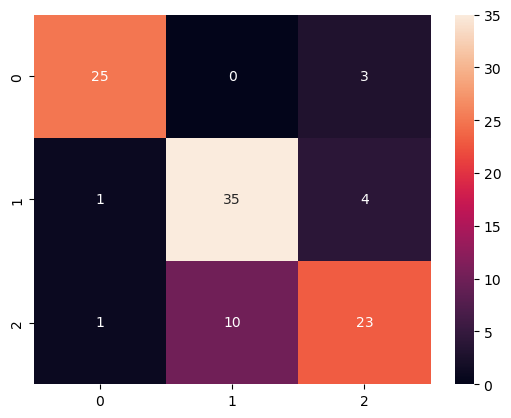

Fold 2 - Accuracy: 0.803921568627451
Confusion matrix:


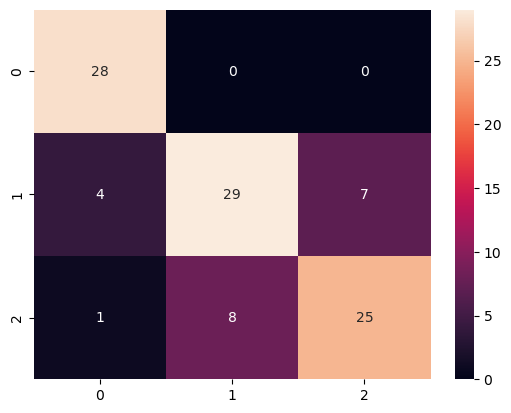

Fold 3 - Accuracy: 0.7156862745098039
Confusion matrix:


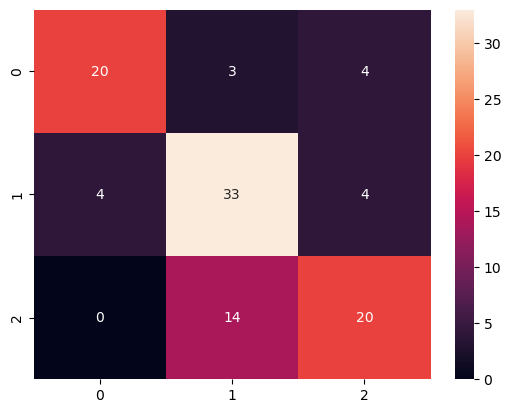

Fold 4 - Accuracy: 0.696078431372549
Confusion matrix:


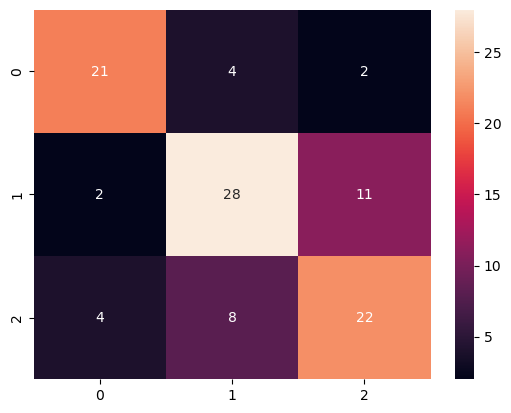

Fold 5 - Accuracy: 0.7029702970297029
Confusion matrix:


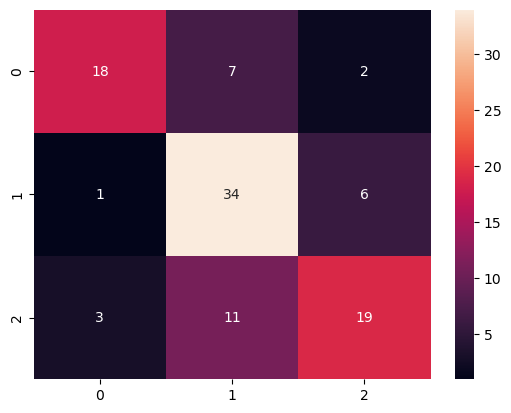

Fold 6 - Accuracy: 0.7227722772277227
Confusion matrix:


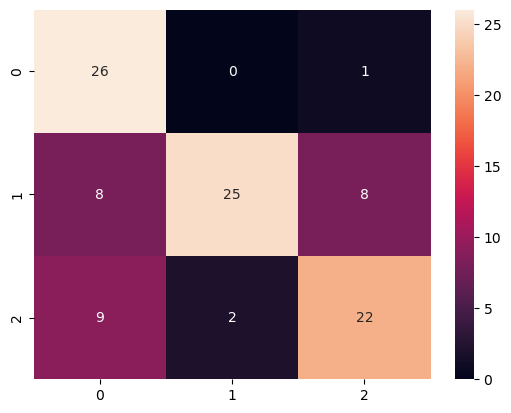

Fold 7 - Accuracy: 0.7623762376237624
Confusion matrix:


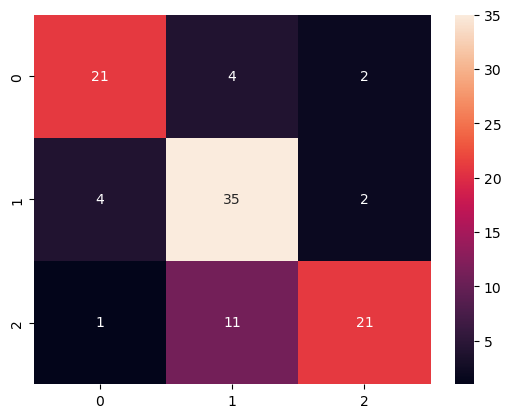

Fold 8 - Accuracy: 0.7029702970297029
Confusion matrix:


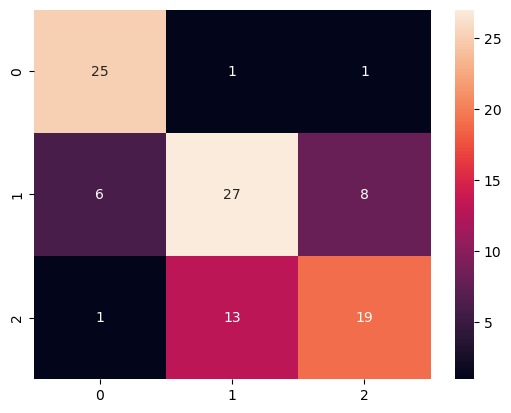

Fold 9 - Accuracy: 0.7029702970297029
Confusion matrix:


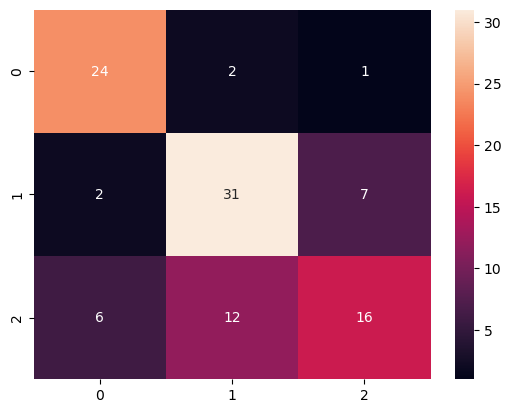

Fold 10 - Accuracy: 0.7821782178217822
Confusion matrix:


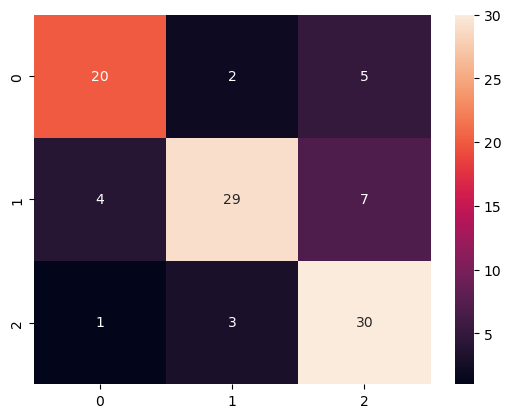

Average Accuracy: 0.7405649388468258


In [9]:
#decision trees

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np
X = df.drop(['RiskLevel', 'BS'], axis=1)
y = df['RiskLevel']
dt = DecisionTreeClassifier()
skf = StratifiedKFold(n_splits=10)

accuracies = []  

for fold_idx, (train_index, val_index) in enumerate(skf.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]
    dt.fit(X_train, y_train)
    y_val_pred = dt.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)
    print(f"Fold {fold_idx + 1} - Accuracy: {accuracy}")
    print("Confusion matrix:")
    cm = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(cm, annot=True)
    plt.show()
avg_accuracy = np.mean(accuracies)
print("Average Accuracy:", avg_accuracy)


Fold 1 Accuracy: 0.8137254901960784
Confusion matrix:


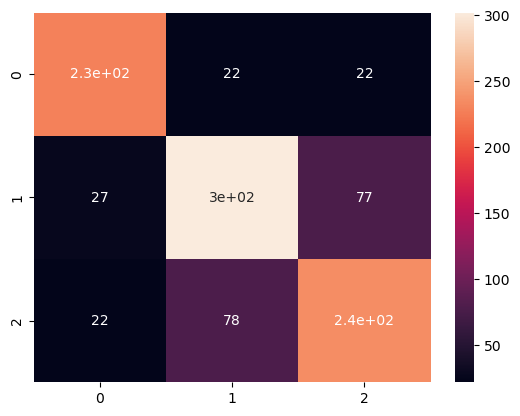

Fold 2 Accuracy: 0.7941176470588235
Confusion matrix:


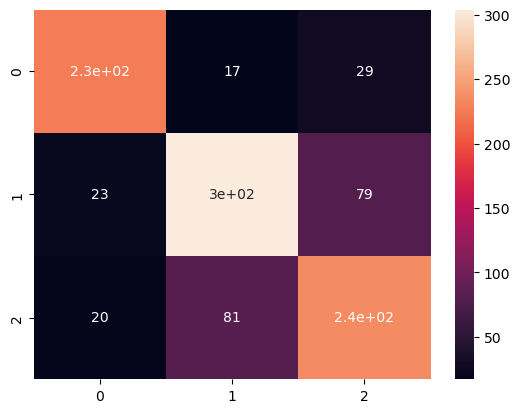

Fold 3 Accuracy: 0.7450980392156863
Confusion matrix:


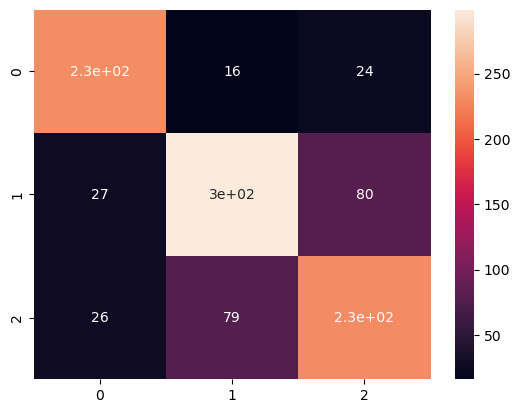

Fold 4 Accuracy: 0.7156862745098039
Confusion matrix:


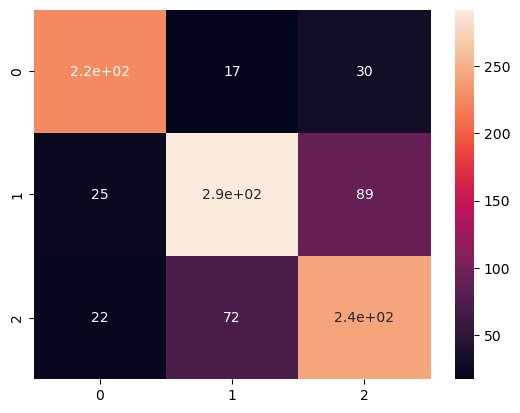

Fold 5 Accuracy: 0.6831683168316832
Confusion matrix:


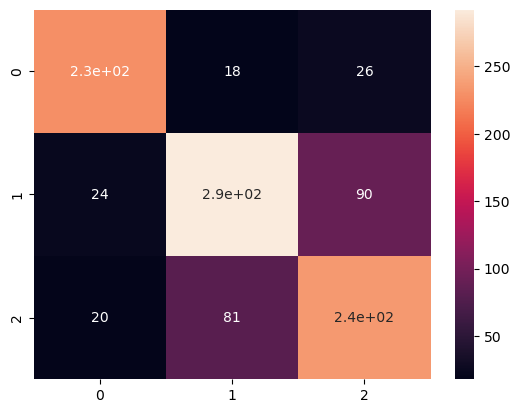

Fold 6 Accuracy: 0.7821782178217822
Confusion matrix:


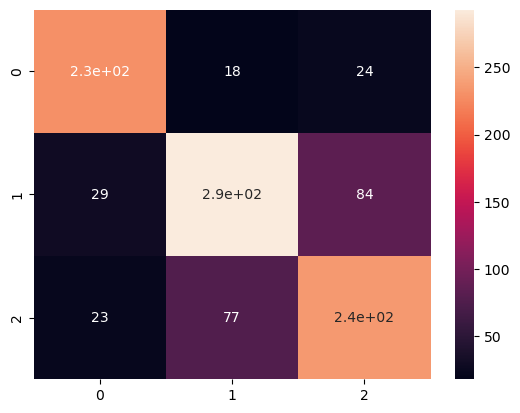

Fold 7 Accuracy: 0.7623762376237624
Confusion matrix:


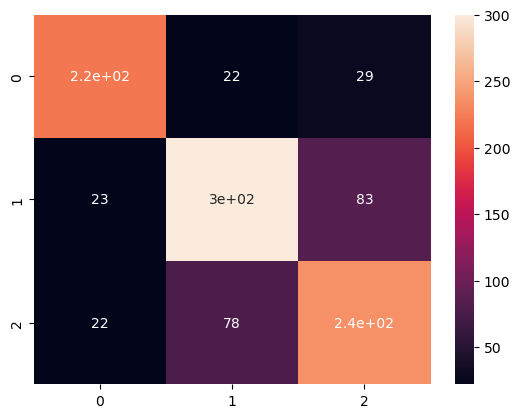

Fold 8 Accuracy: 0.7425742574257426
Confusion matrix:


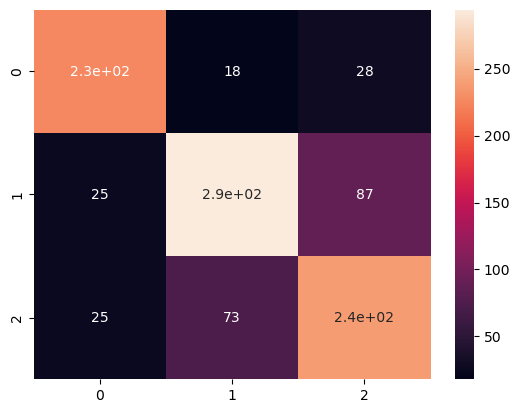

Fold 9 Accuracy: 0.693069306930693
Confusion matrix:


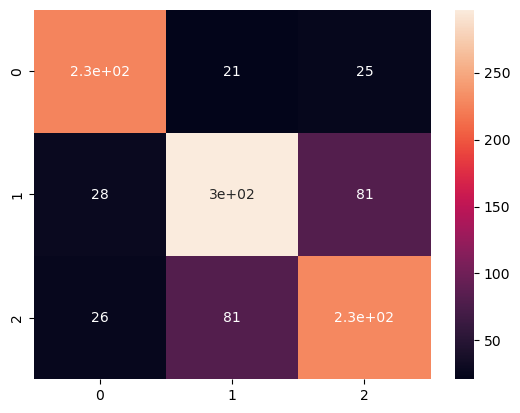

Fold 10 Accuracy: 0.7722772277227723
Confusion matrix:


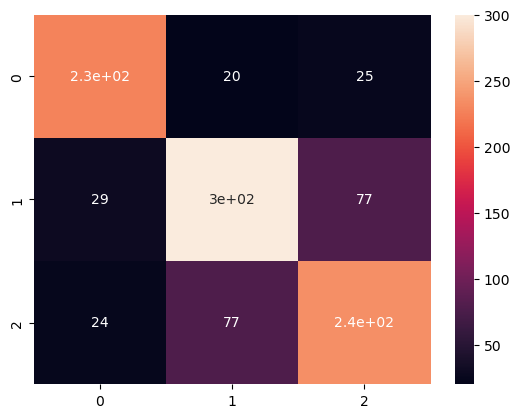

Average Accuracy: 0.7504271015336827


In [10]:
#bagging using decision tree classifier

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
X = df.drop(['RiskLevel', 'BS'], axis=1)
y = df['RiskLevel']
base_classifier = DecisionTreeClassifier()
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10)
scores = cross_val_score(bagging_classifier, X, y, cv=10)
for fold_idx, score in enumerate(scores):
    bagging_classifier.fit(X, y)
    y_pred = cross_val_predict(bagging_classifier, X, y, cv=10)
    cm = confusion_matrix(y, y_pred)
    print(f"Fold {fold_idx + 1} Accuracy: {score}")
    print("Confusion matrix:")
    sns.heatmap(cm, annot=True)
    plt.show()
average_score = scores.mean()
print("Average Accuracy:", average_score)


Fold 1 Accuracy: 0.8137254901960784
Confusion matrix:


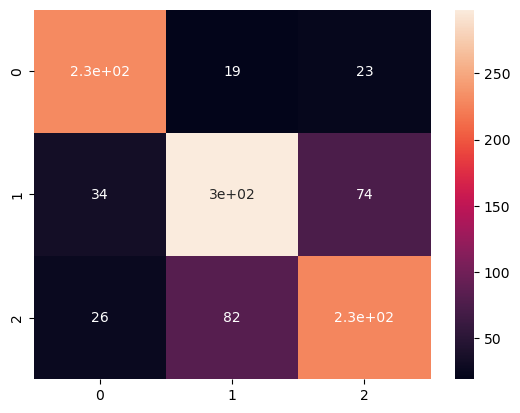

Fold 2 Accuracy: 0.8235294117647058
Confusion matrix:


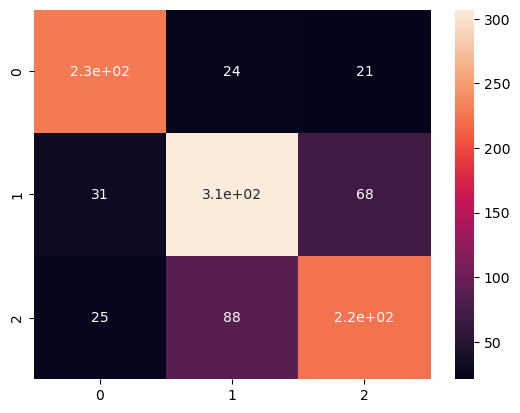

Fold 3 Accuracy: 0.7254901960784313
Confusion matrix:


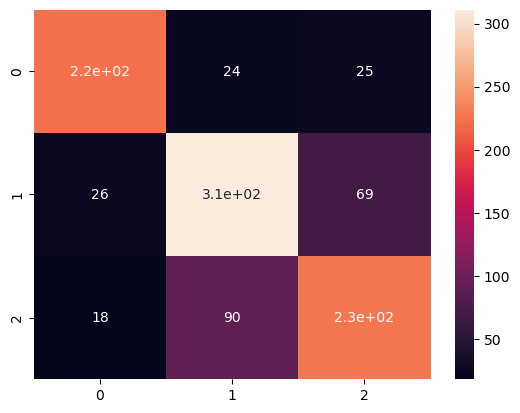

Fold 4 Accuracy: 0.6764705882352942
Confusion matrix:


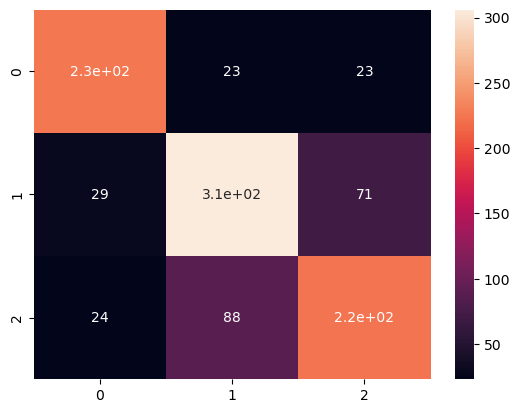

Fold 5 Accuracy: 0.7029702970297029
Confusion matrix:


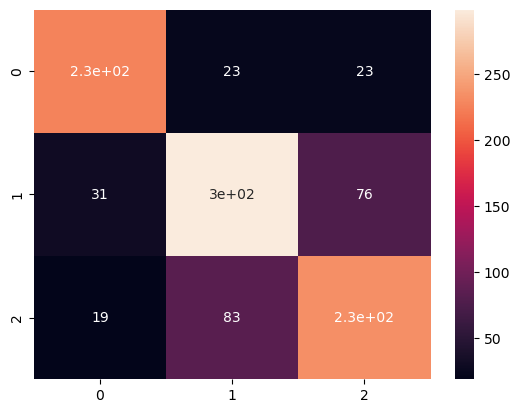

Fold 6 Accuracy: 0.7821782178217822
Confusion matrix:


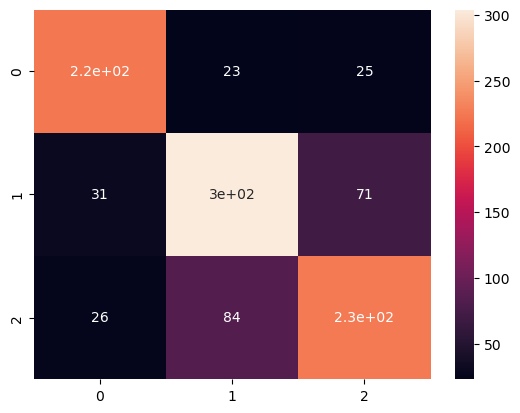

Fold 7 Accuracy: 0.7623762376237624
Confusion matrix:


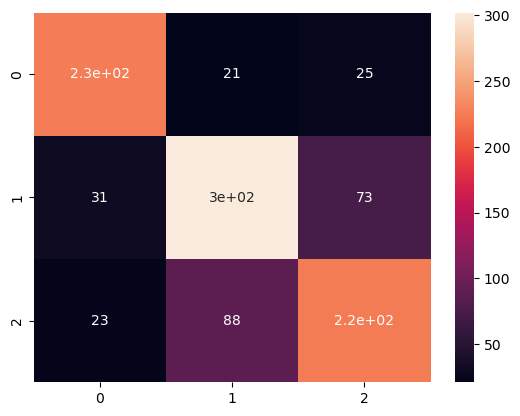

Fold 8 Accuracy: 0.7128712871287128
Confusion matrix:


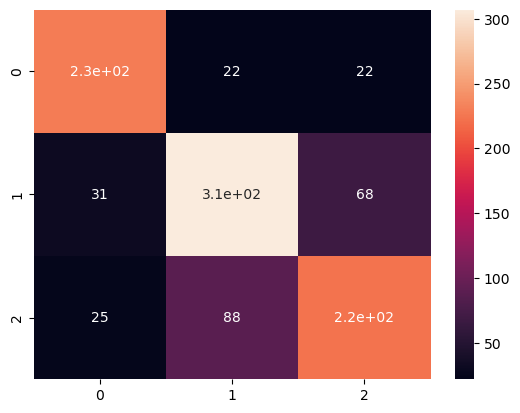

Fold 9 Accuracy: 0.693069306930693
Confusion matrix:


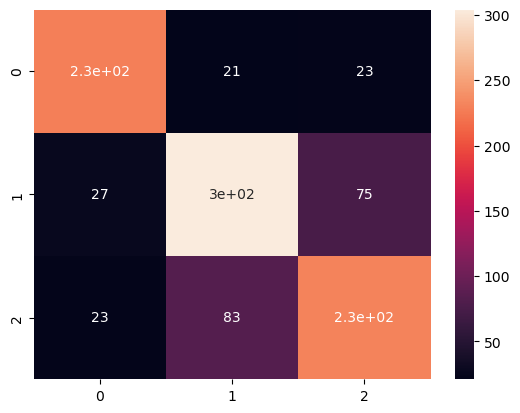

Fold 10 Accuracy: 0.7722772277227723
Confusion matrix:


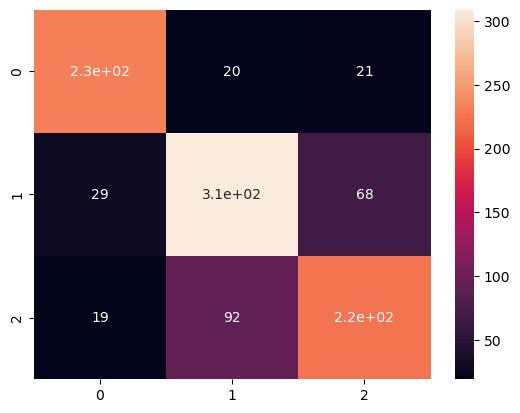

Average Accuracy: 0.7464958260531935


In [11]:
#adaboost

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
X = df.drop(['RiskLevel', 'BS'], axis=1)
y = df['RiskLevel']
base_classifier = DecisionTreeClassifier()
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=10)
scores = cross_val_score(adaboost_classifier, X, y, cv=10)
for fold_idx, score in enumerate(scores):
    adaboost_classifier.fit(X, y)
    y_pred = cross_val_predict(adaboost_classifier, X, y, cv=10)
    cm = confusion_matrix(y, y_pred)
    print(f"Fold {fold_idx + 1} Accuracy: {score}")
    print("Confusion matrix:")
    sns.heatmap(cm, annot=True)
    plt.show()
average_score = scores.mean()
print("Average Accuracy:", average_score)


Fold 1 Accuracy: 0.8137254901960784
Confusion matrix:


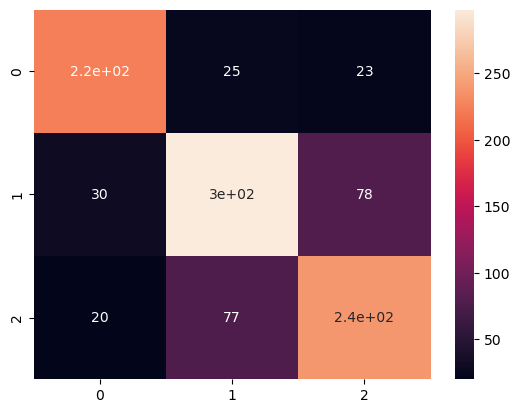

Fold 2 Accuracy: 0.803921568627451
Confusion matrix:


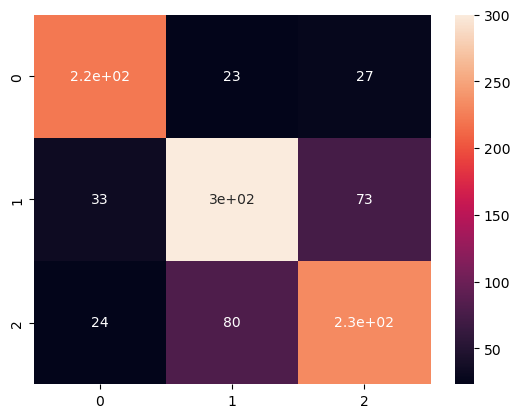

Fold 3 Accuracy: 0.7156862745098039
Confusion matrix:


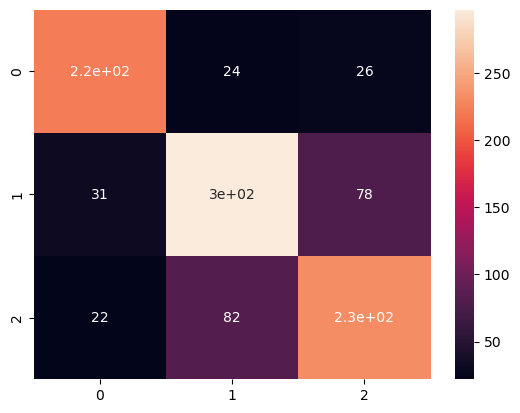

Fold 4 Accuracy: 0.7156862745098039
Confusion matrix:


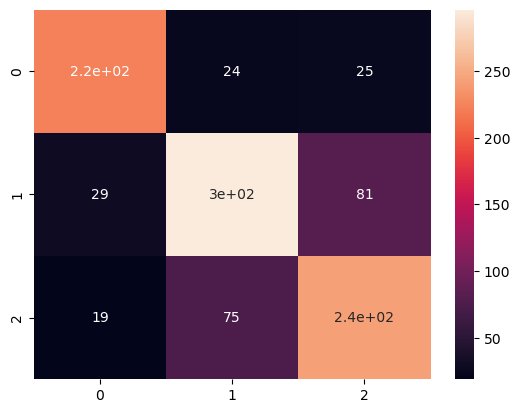

Fold 5 Accuracy: 0.693069306930693
Confusion matrix:


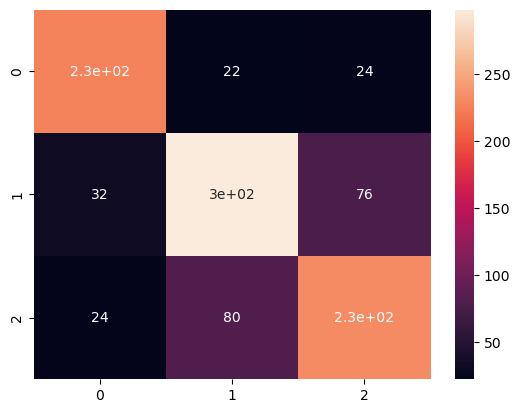

Fold 6 Accuracy: 0.7029702970297029
Confusion matrix:


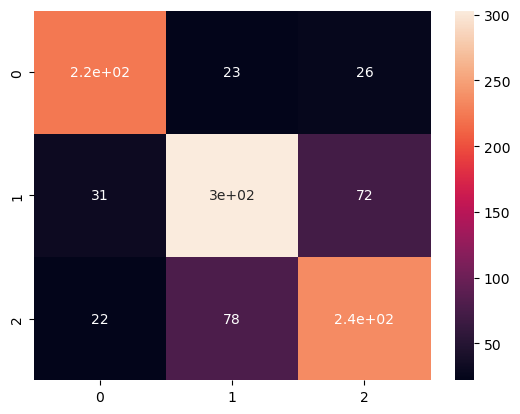

Fold 7 Accuracy: 0.7623762376237624
Confusion matrix:


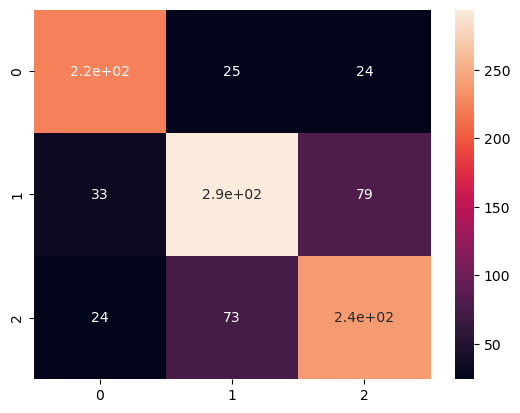

Fold 8 Accuracy: 0.7029702970297029
Confusion matrix:


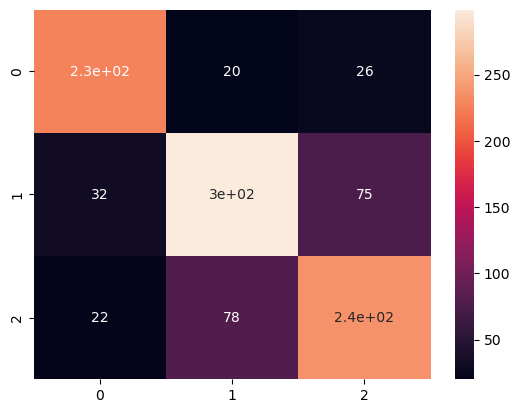

Fold 9 Accuracy: 0.7029702970297029
Confusion matrix:


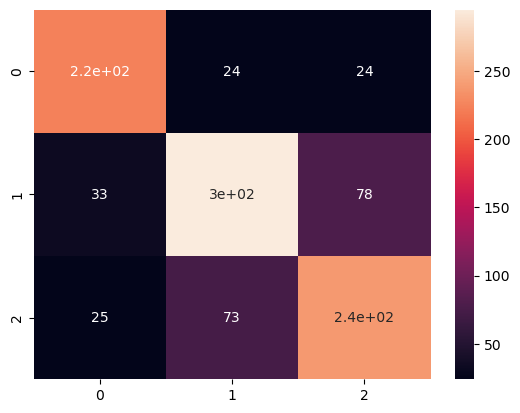

Fold 10 Accuracy: 0.7722772277227723
Confusion matrix:


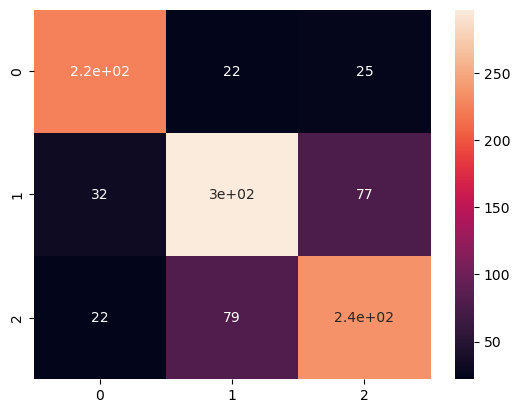

Average Accuracy: 0.7385653271209474


In [12]:
#PCA using random forest classifier
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
X = df.drop(['RiskLevel', 'BS'], axis=1)
y = df['RiskLevel']
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
classifier = RandomForestClassifier()
scores = cross_val_score(classifier, X_pca, y, cv=10)
for fold_idx, score in enumerate(scores):
    classifier.fit(X_pca, y)
    y_pred = cross_val_predict(classifier, X_pca, y, cv=10)
    cm = confusion_matrix(y, y_pred)
    print(f"Fold {fold_idx + 1} Accuracy: {score}")
    print("Confusion matrix:")
    sns.heatmap(cm, annot=True)
    plt.show()
average_score = scores.mean()
print("Average Accuracy:", average_score)


Fold 1 - Accuracy: 0.6078431372549019
Confusion matrix:


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


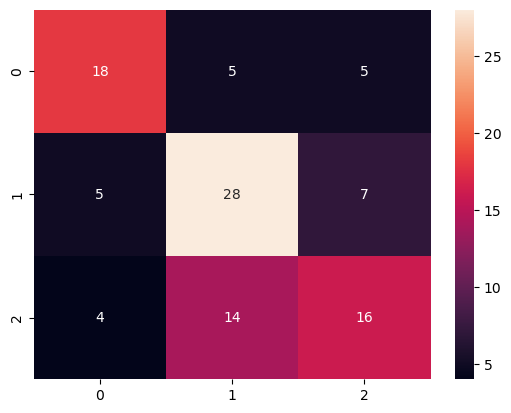

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 2 - Accuracy: 0.6274509803921569
Confusion matrix:


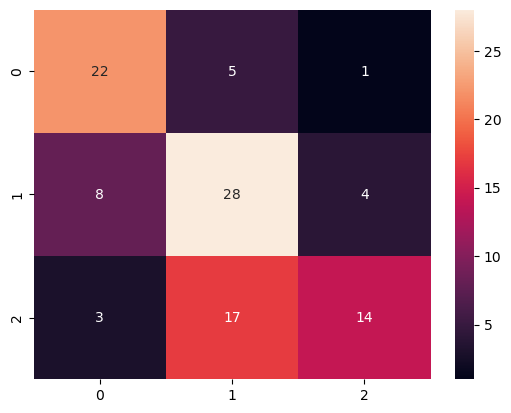

Fold 3 - Accuracy: 0.5294117647058824
Confusion matrix:


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


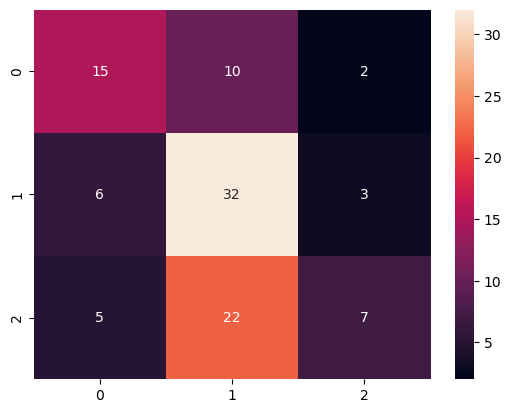

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 4 - Accuracy: 0.5098039215686274
Confusion matrix:


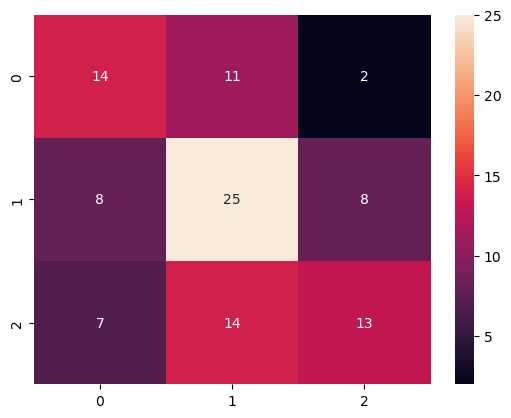

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 5 - Accuracy: 0.5544554455445545
Confusion matrix:


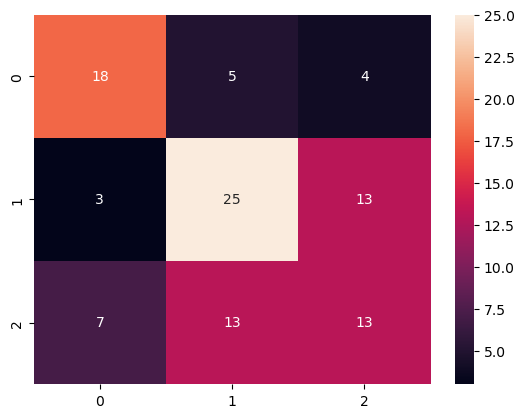

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 6 - Accuracy: 0.5841584158415841
Confusion matrix:


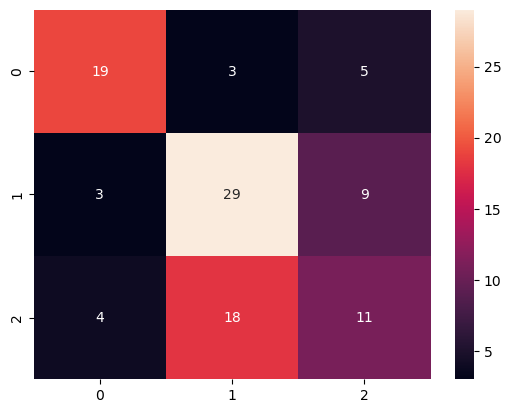

Fold 7 - Accuracy: 0.5247524752475248
Confusion matrix:


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


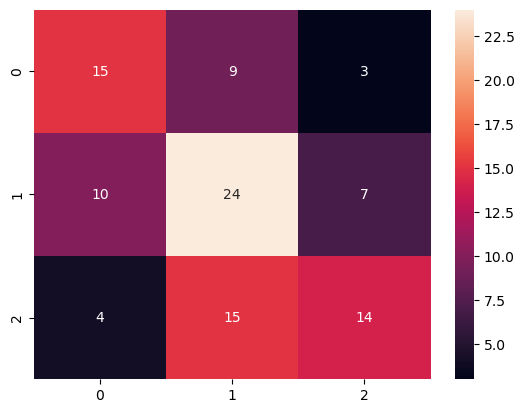

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 8 - Accuracy: 0.4752475247524752
Confusion matrix:


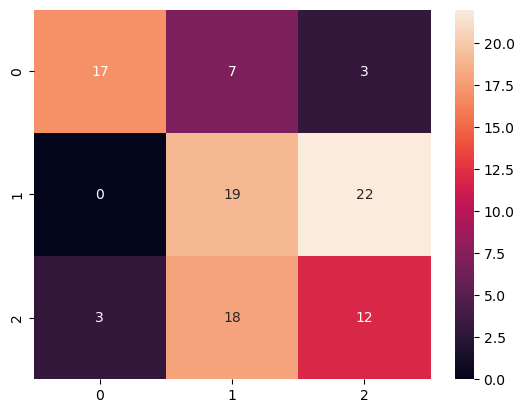

Fold 9 - Accuracy: 0.5841584158415841
Confusion matrix:


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


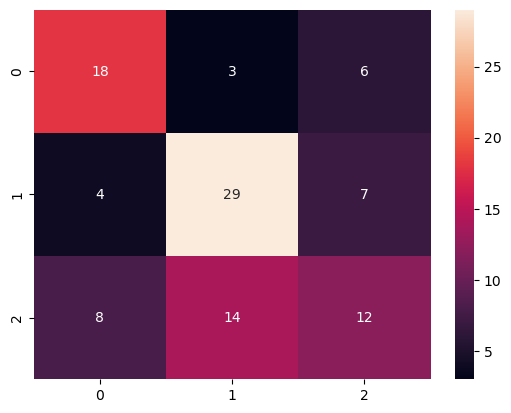

Fold 10 - Accuracy: 0.5148514851485149
Confusion matrix:


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


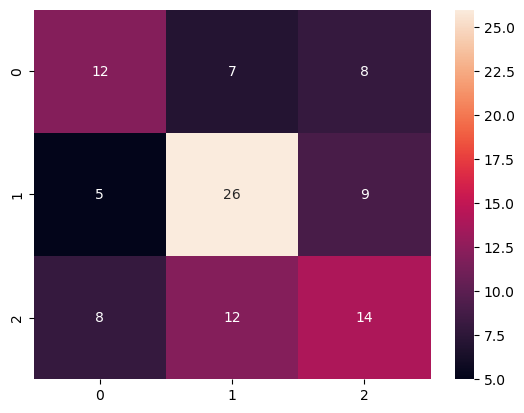

Average Accuracy: 0.5512133566297805


In [13]:
#gradient descent with logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
X = df.drop(['RiskLevel', 'BS'], axis=1)
y = df['RiskLevel']
logreg = LogisticRegression()
skf = StratifiedKFold(n_splits=10)

accuracies = []  

for fold_idx, (train_index, val_index) in enumerate(skf.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    logreg.fit(X_train, y_train)
    y_val_pred = logreg.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)
    print(f"Fold {fold_idx + 1} - Accuracy: {accuracy}")
    print("Confusion matrix:")
    cm = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(cm, annot=True)
    plt.show()
avg_accuracy = np.mean(accuracies)
print("Average Accuracy:", avg_accuracy)







4/4 [==============================] - 0s 1ms/step
Fold 1 - Accuracy: 0.49019607843137253
Confusion matrix:


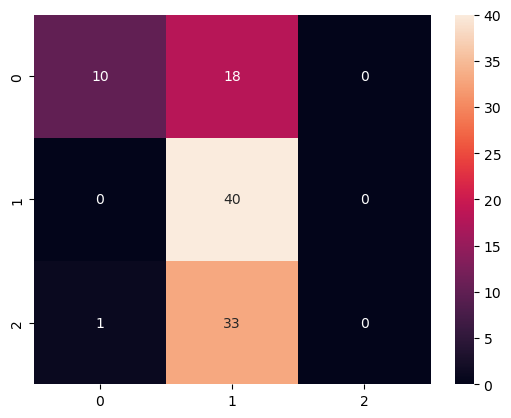

4/4 [==============================] - 0s 1ms/step
Fold 2 - Accuracy: 0.47058823529411764
Confusion matrix:


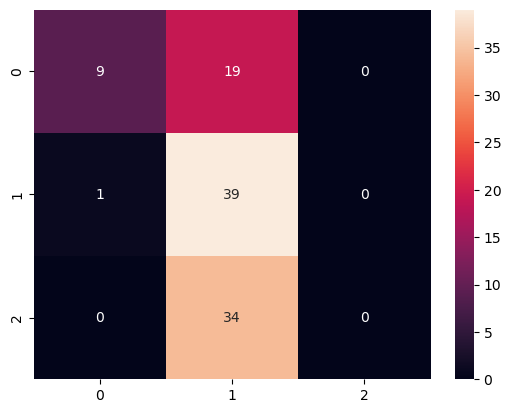

4/4 [==============================] - 0s 1ms/step
Fold 3 - Accuracy: 0.46078431372549017
Confusion matrix:


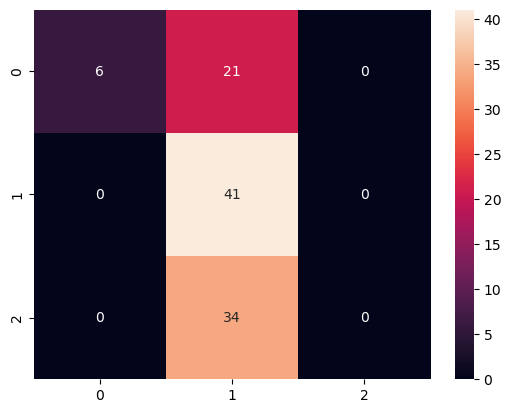

4/4 [==============================] - 0s 1ms/step
Fold 4 - Accuracy: 0.47058823529411764
Confusion matrix:


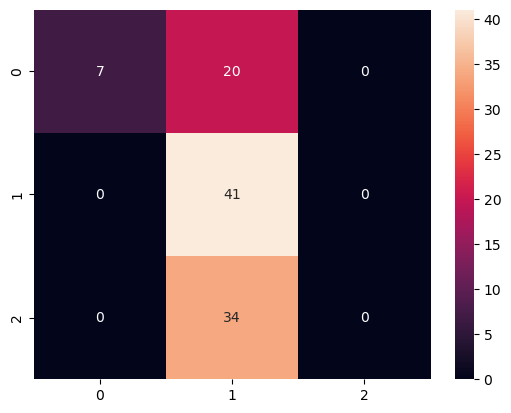

4/4 [==============================] - 0s 1ms/step
Fold 5 - Accuracy: 0.5445544554455446
Confusion matrix:


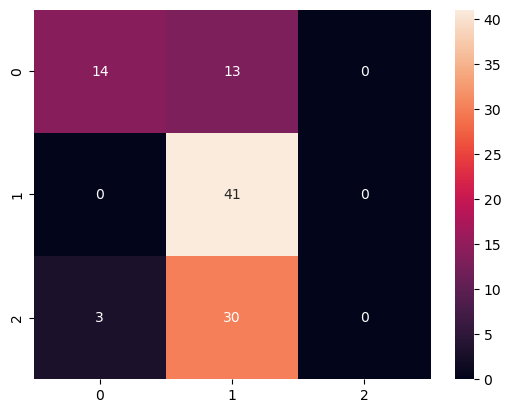

4/4 [==============================] - 0s 1ms/step
Fold 6 - Accuracy: 0.4752475247524752
Confusion matrix:


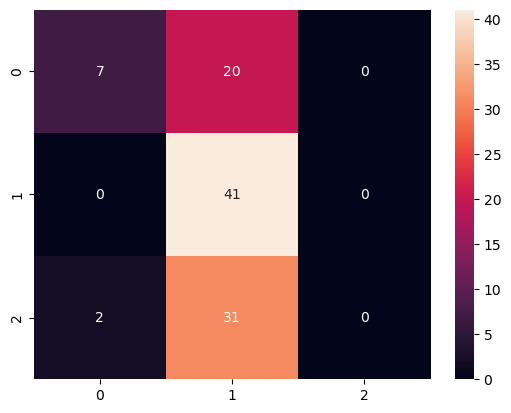

4/4 [==============================] - 0s 1ms/step
Fold 7 - Accuracy: 0.5247524752475248
Confusion matrix:


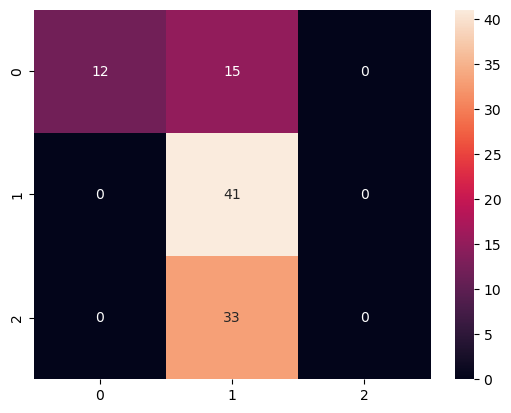

4/4 [==============================] - 0s 1ms/step
Fold 8 - Accuracy: 0.504950495049505
Confusion matrix:


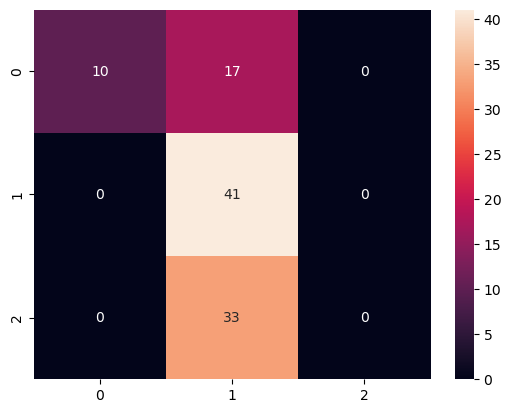

4/4 [==============================] - 0s 1ms/step
Fold 9 - Accuracy: 0.48514851485148514
Confusion matrix:


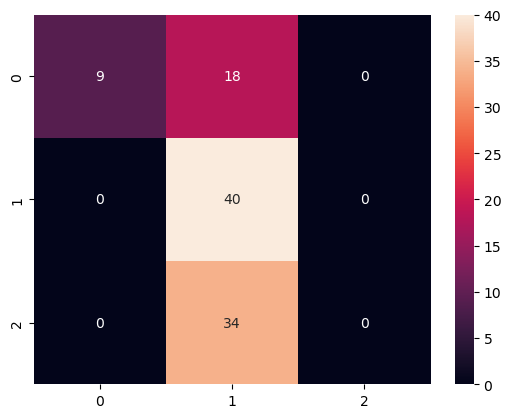

4/4 [==============================] - 0s 1ms/step
Fold 10 - Accuracy: 0.5247524752475248
Confusion matrix:


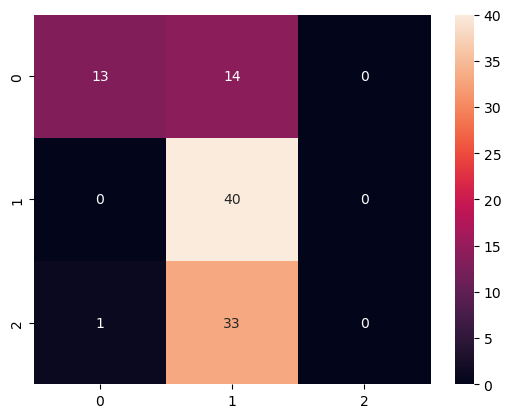

Average Accuracy: 0.4951562803339158


In [14]:
#Neural Network
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('Dataset.csv')
X = df.drop(['RiskLevel', 'BS'], axis=1)
y = df['RiskLevel']


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracies = []

for fold_idx, (train_index, val_index) in enumerate(skf.split(X_scaled, y)):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y[train_index], y[val_index]

    
    model = create_model()
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    
    y_val_pred_prob = model.predict(X_val)
    y_val_pred = (y_val_pred_prob > 0.5).astype(int)

    
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)

    
    print(f"Fold {fold_idx + 1} - Accuracy: {accuracy}")
    print("Confusion matrix:")
    cm = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(cm, annot=True)
    plt.show()


avg_accuracy = np.mean(accuracies)
print("Average Accuracy:", avg_accuracy)


4/4 [==============================] - 0s 1ms/step
Fold 1 - Accuracy: 0.49019607843137253
Confusion matrix:


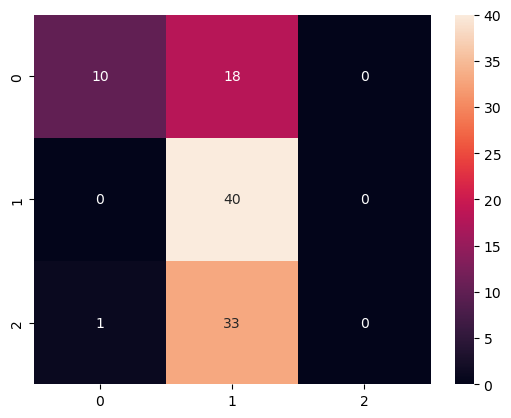

4/4 [==============================] - 0s 1ms/step
Fold 2 - Accuracy: 0.4803921568627451
Confusion matrix:


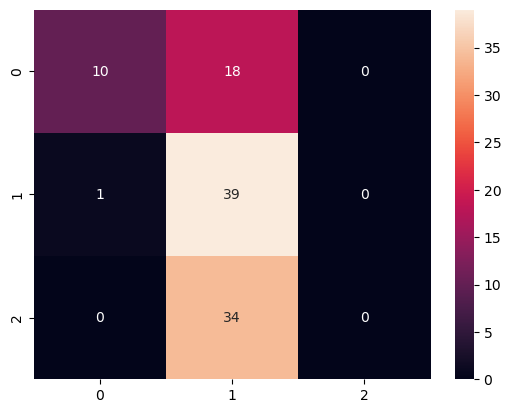

4/4 [==============================] - 0s 1ms/step
Fold 3 - Accuracy: 0.45098039215686275
Confusion matrix:


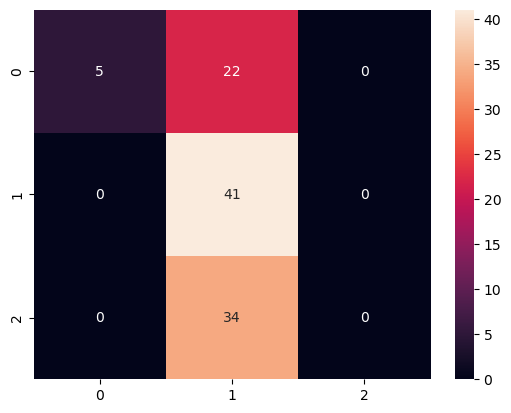

4/4 [==============================] - 0s 1ms/step
Fold 4 - Accuracy: 0.47058823529411764
Confusion matrix:


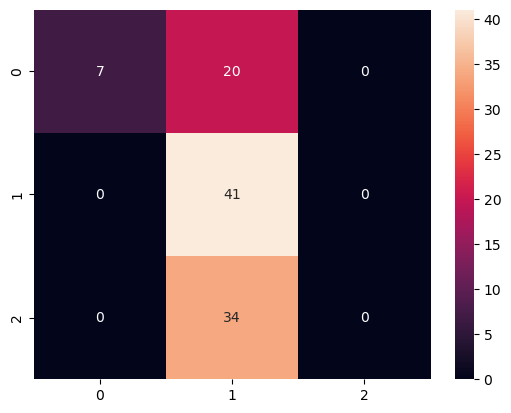

4/4 [==============================] - 0s 1ms/step
Fold 5 - Accuracy: 0.504950495049505
Confusion matrix:


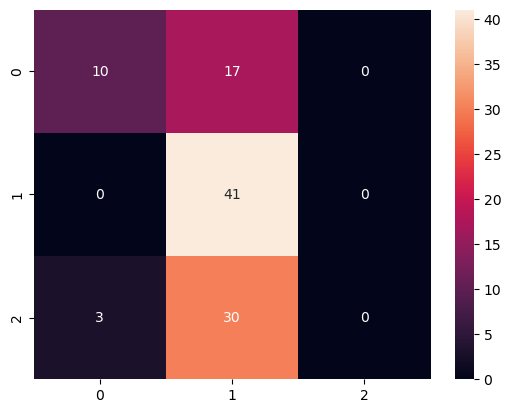

4/4 [==============================] - 0s 1ms/step
Fold 6 - Accuracy: 0.4752475247524752
Confusion matrix:


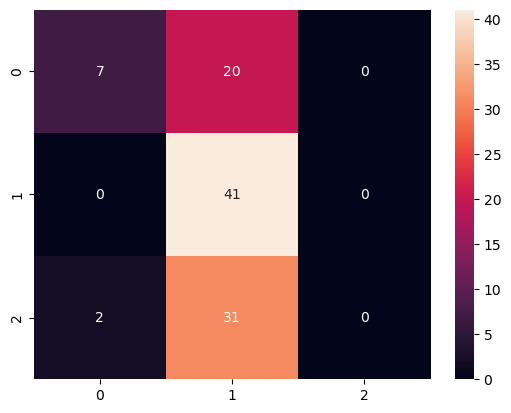

4/4 [==============================] - 0s 1ms/step
Fold 7 - Accuracy: 0.5247524752475248
Confusion matrix:


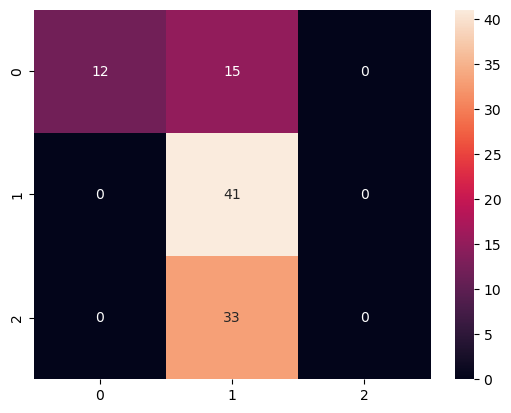

4/4 [==============================] - 0s 2ms/step
Fold 8 - Accuracy: 0.504950495049505
Confusion matrix:


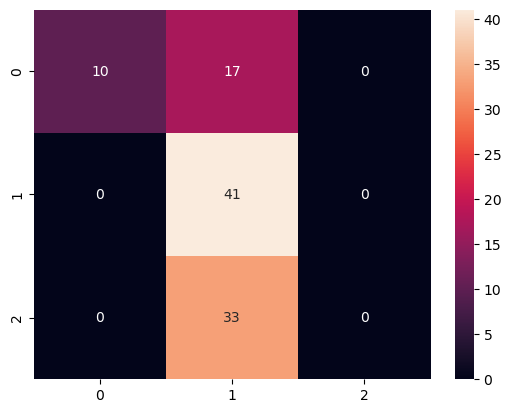

4/4 [==============================] - 0s 1ms/step
Fold 9 - Accuracy: 0.48514851485148514
Confusion matrix:


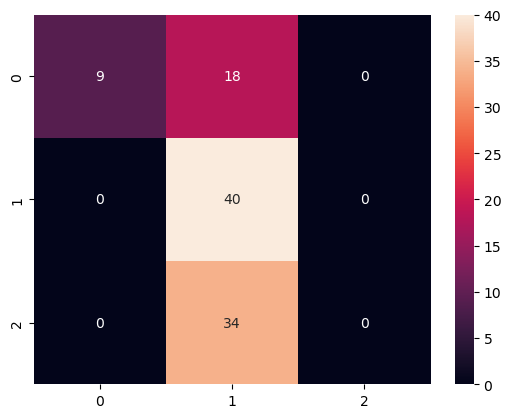

4/4 [==============================] - 0s 1ms/step
Fold 10 - Accuracy: 0.49504950495049505
Confusion matrix:


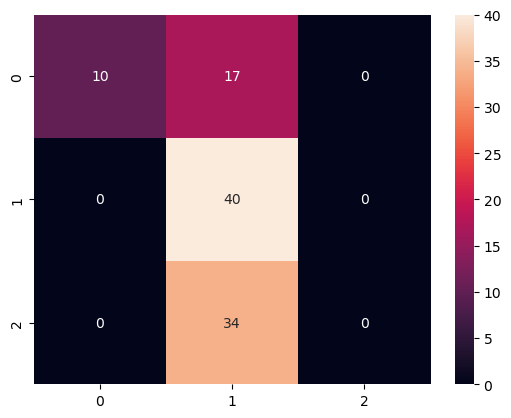

Average Accuracy: 0.48822558726460874


In [15]:
#MLP
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('Dataset.csv')
X = df.drop(['RiskLevel', 'BS'], axis=1)
y = df['RiskLevel']


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Defining the neural network model
def create_mlp_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracies = []

for fold_idx, (train_index, val_index) in enumerate(skf.split(X_scaled, y)):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Creating and training the MLP model
    mlp_model = create_mlp_model()
    mlp_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    
    y_val_pred_prob = mlp_model.predict(X_val)
    y_val_pred = (y_val_pred_prob > 0.5).astype(int)

    
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)

    
    print(f"Fold {fold_idx + 1} - Accuracy: {accuracy}")
    print("Confusion matrix:")
    cm = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(cm, annot=True)
    plt.show()


avg_accuracy = np.mean(accuracies)
print("Average Accuracy:", avg_accuracy)


4/4 [==============================] - 0s 841us/step
Fold 1 - Accuracy: 0.4803921568627451
Confusion matrix:


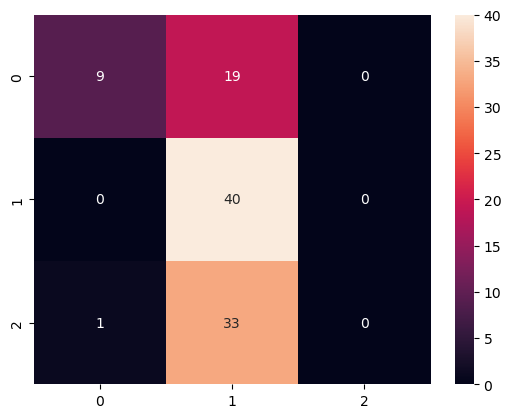

4/4 [==============================] - 0s 2ms/step
Fold 2 - Accuracy: 0.47058823529411764
Confusion matrix:


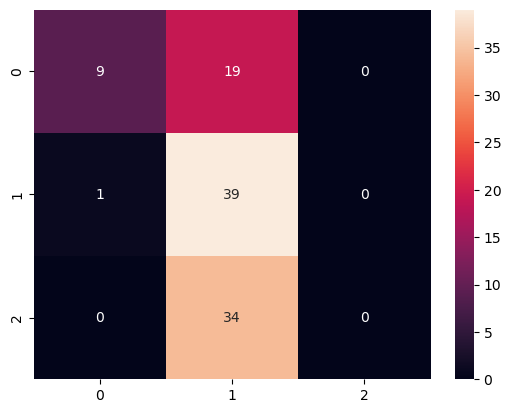

4/4 [==============================] - 0s 1ms/step
Fold 3 - Accuracy: 0.46078431372549017
Confusion matrix:


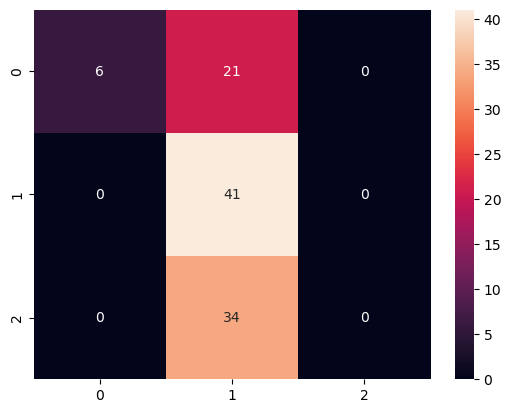

4/4 [==============================] - 0s 1ms/step
Fold 4 - Accuracy: 0.46078431372549017
Confusion matrix:


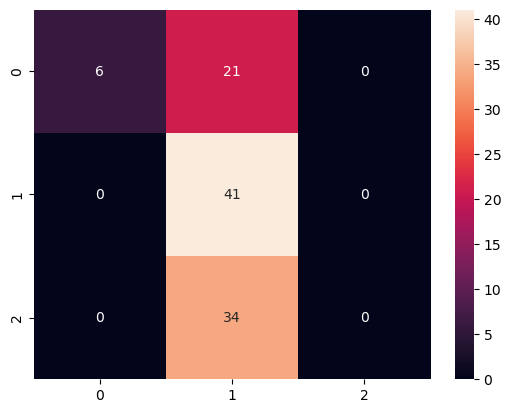

4/4 [==============================] - 0s 901us/step
Fold 5 - Accuracy: 0.504950495049505
Confusion matrix:


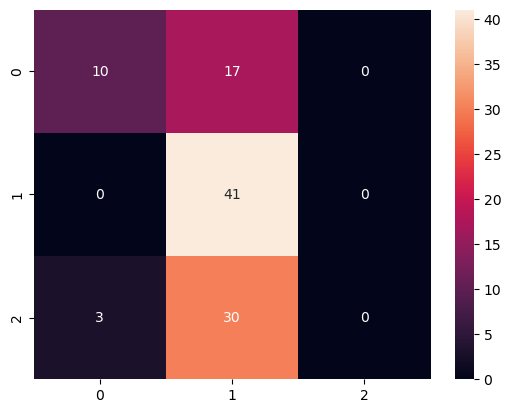

4/4 [==============================] - 0s 987us/step
Fold 6 - Accuracy: 0.4752475247524752
Confusion matrix:


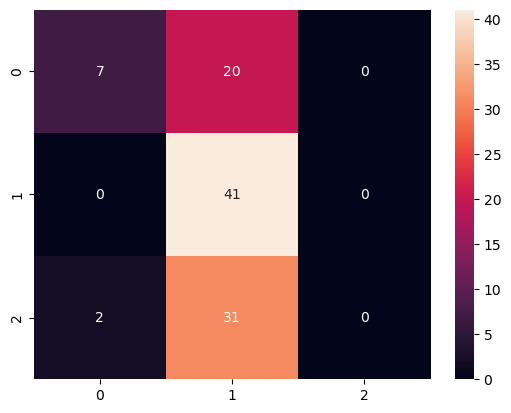

4/4 [==============================] - 0s 1ms/step
Fold 7 - Accuracy: 0.48514851485148514
Confusion matrix:


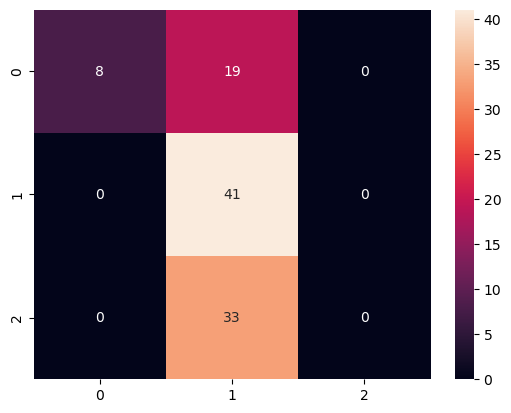

4/4 [==============================] - 0s 1ms/step
Fold 8 - Accuracy: 0.504950495049505
Confusion matrix:


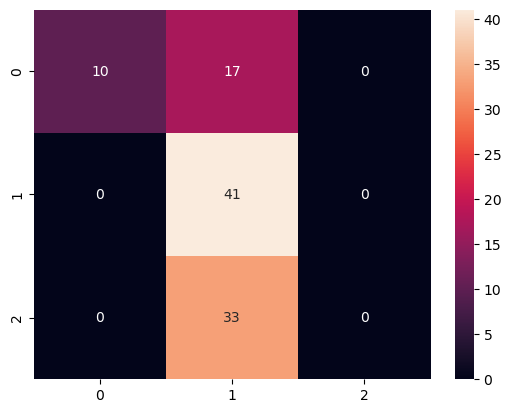

4/4 [==============================] - 0s 1ms/step
Fold 9 - Accuracy: 0.48514851485148514
Confusion matrix:


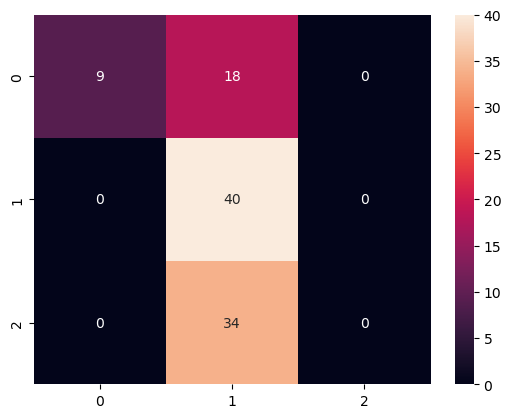

4/4 [==============================] - 0s 1ms/step
Fold 10 - Accuracy: 0.5247524752475248
Confusion matrix:


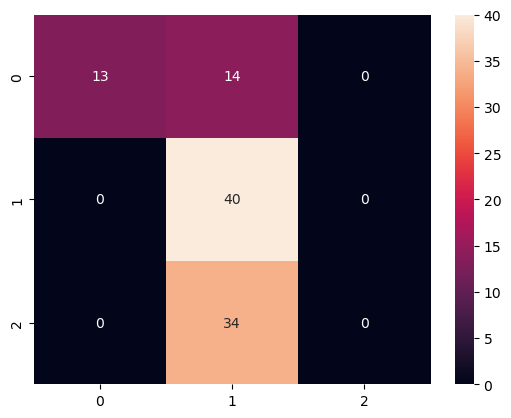

Average Accuracy: 0.4852747039409824


In [16]:
#ANN
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('Dataset.csv')
X = df.drop(['RiskLevel', 'BS'], axis=1)
y = df['RiskLevel']


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Defining the neural network model
def create_ann_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracies = []

for fold_idx, (train_index, val_index) in enumerate(skf.split(X_scaled, y)):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Creating and training the ANN model
    ann_model = create_ann_model()
    ann_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    
    y_val_pred_prob = ann_model.predict(X_val)
    y_val_pred = (y_val_pred_prob > 0.5).astype(int)

    
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)

    
    print(f"Fold {fold_idx + 1} - Accuracy: {accuracy}")
    print("Confusion matrix:")
    cm = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(cm, annot=True)
    plt.show()


avg_accuracy = np.mean(accuracies)
print("Average Accuracy:", avg_accuracy)
